 # Práctica de aprendizaje automático (parte 3)

Entrega este cuaderno habiendo **ejecutado todas las celdas**. Incluye en la entrega **todos los ficheros necesarios para su ejecución**.

Asegúrate de que la presentación está bien estructurada: Se valorará la **claridad, concisión, y completitud** del informe.

Se trata de una práctica abierta: **sé intrépido y explora**. 

# Construcción de un clasificador en una base de datos real (3.5 puntos)

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import cross_val_score
import numpy as np

%matplotlib inline

In [2]:
df = pd.read_csv('./data/german_credit_data.csv', sep=';')
# Source: https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)
# This dataset classifies people described by a set of attributes as good or bad credit risks. Comes in two formats (one all numeric). Also comes with a cost matrix

print(df.shape)
df.head(5)

(1000, 21)


,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [3]:
class_label = 'default'
feature_names = list(df.columns)
feature_names.remove(class_label)
print(feature_names)
X = df[feature_names].values
y = df[class_label].values

['account_check_status ', 'duration_in_month ', 'credit_history ', 'purpose ', 'credit_amount ', 'savings ', 'present_emp_since ', 'installment_as_income_perc ', 'personal_status_sex ', 'other_debtors ', 'present_res_since ', 'property ', 'age ', 'other_installment_plans ', 'housing ', 'credits_this_bank ', 'job ', 'people_under_maintenance ', 'telephone ', 'foreign_worker']


**Estadísticos básicos de cada atributo:**

In [4]:
df.describe()

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.300000,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,0.458487,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,0.000000,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,0.000000,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,0.000000,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,1.000000,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,1.000000,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


**Datos codificados de forma numérica**

In [5]:
df = pd.read_csv('./data/german_credit_data_numeric.csv', sep=';')
class_label = 'Class'
feature_names = list(df.columns)
feature_names.remove(class_label)
print(feature_names)
X = df[feature_names].values
y = df[class_label].values

['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23']


**Histogramas suavizados de cada atributo en cada clase. El color indica la clase ("default"/"no default"):**

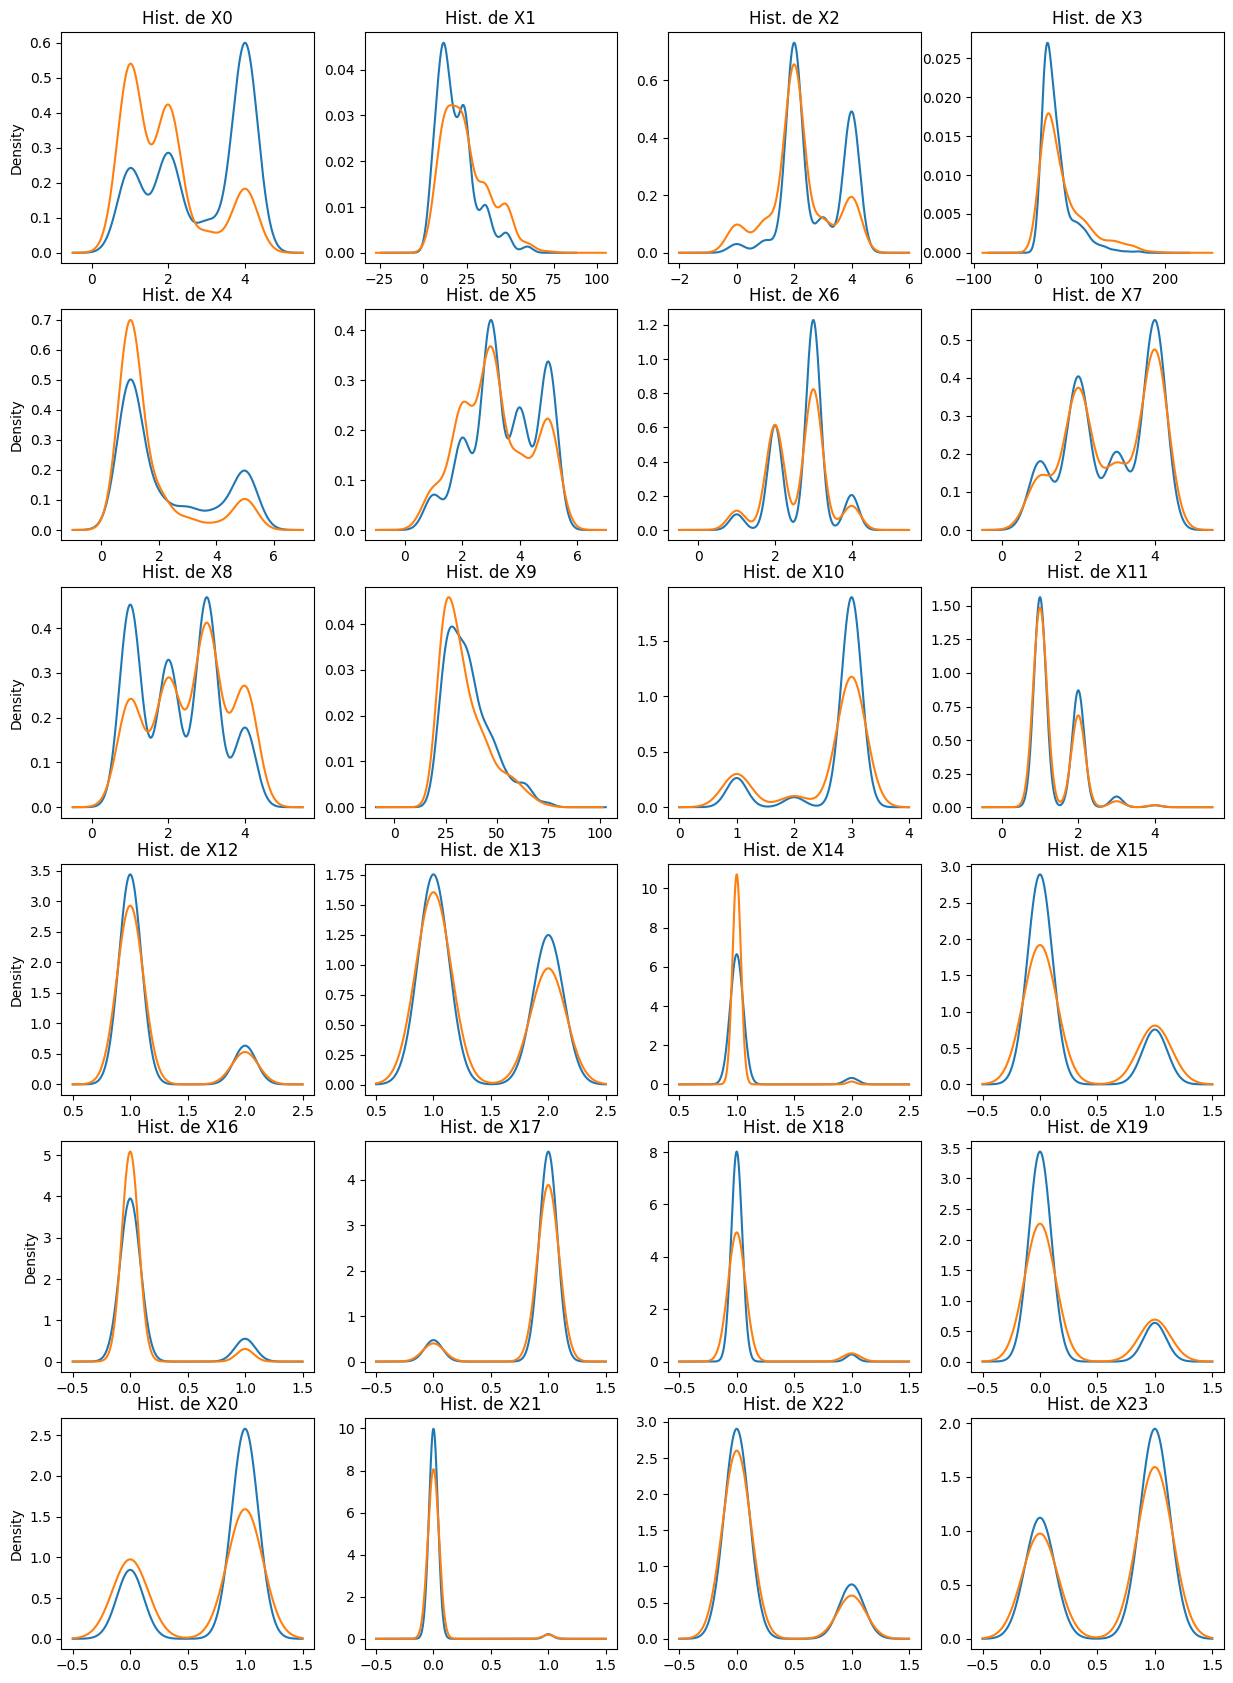

In [6]:
plt.figure(figsize=(15, 21))
n_cols_plot = 4
n_rows_plot = int(len(feature_names) / n_cols_plot)
for i,n in enumerate(feature_names):
    plt.subplot(n_rows_plot, n_cols_plot, i+1)
    aux = 'Density' if i%n_cols_plot == 0 else ''
    df.groupby('Class')[n].plot(kind='kde', title='Hist. de '+n)
    plt.ylabel(aux)

### 1. **Describe las características de los datos:**

##### **1.1 Número y tipo (nominales no ordenados, nominales ordenados, numéricos) de atributos.**


En cuanto al tipo de atributos encontramos de los tres tipos:

- **Nominal no ordenado**: son categorías o etiquetas en donde el orden no importa o no tiene sentido decir que uno es mayor que el otro. Los atributos de nuestro set de datos de este tipo son: `credit_history`, `purpose`, `personal_status_sex`, `other_debtors`, `property`, `other_installment_plans`, `housing`, `telephone` y `foreign_worker`.

- **Nominal ordenado**: son categorías que sí tienen un orden lógico o jerarquía, pero no son números matemáticos directos. Los atributos de nuesto set de datos de este tipo son: `account_check_status`, `savings`, `present_emp_since` y `job`. 

- **Numéricos**: son valores matemáticos con los que se pueden hacer cálculos. Los atributos en nuestro set de datos que son de este tipo son: `duration_in_month`, `credit_amount`, `installment_as_income_perc`, `present_res_since`, `age`, `credits_this_bank` y `people_under_maintenance`.

Si quisieramos ver, además del tipo, todos los posibles valores que puede tomar cada atributo, podemos consultarlo en el apartado de Additional Variable Information de la web original ([German Credit Dataset](https://archive.ics.uci.edu/dataset/144/statlog+german+credit+data)).

##### **1.2 Tamaño del conjunto de datos.**

Para describir las características de los datos nos vamos a fijar en el comando realizado anteriormente `df.head(5)`. Además, podemos averiguar el tamaño de los datos haciendo uso de la función `df.shape()`. Este comando está realizado en las celdas anteriores, obteniendo:
$$(1000,21)$$
El primer número de la salida de este comando hace referencia al tamaño del conjunto de datos. Por otro lado, el segundo número, el 21, denota el número de atributos o características por cada observación, pero hay que tener en cuenta de que uno de ellos, `status` no es un atributo más si no la clase o label de cada observación. Luego el número de atributos reales son 20.

##### **1.3 ¿Qué atributos parece que tendrán más relevancia para predicción?**

Por otro lado, para determinar que atributos parece que tendrán más relevancia, primero nos fijamos en lo cualitativo, es decir, qué aspectos, intuitivamente hablando, deberían ser importantes para diferenciar las clases. Por lo tanto, suponemos que aquellos que tendrán más importancia serán: `credit_history` al hacer referencia directa al historial del cliente con respecto al pago de créditos, `credit_amount` que dictamina el tamaño de crédito, `job` al denotar estabilidad económica al tener ingresos estables o `housing` al suponer un gasto extra.

Más allá de lo cualitativo, para ver que atributos tendrán más relevancia, nos fijamos en los histogramas ploteados anteriormente. Los atributos que diferenciarán más facilmente a las clases son aquellas en las que encontramos densidades muy variopintas o, dicho de otro modo, regiones donde se diferencia claramente una clase de la otra. Por otro lado, es cierto que este aspecto no es suficiente para poder establecer qué atributos utilizar para el predictor. Hemos decidido tener en cuenta más aspectos, como por ejemplo, la correlación de dichos atributos con respecto a la clase, es decir, tomaremos aquellos atributos que tengan más correlación o, dicho de otro modo, cogemos los atributos que se ''relacionan'' más con la clase.

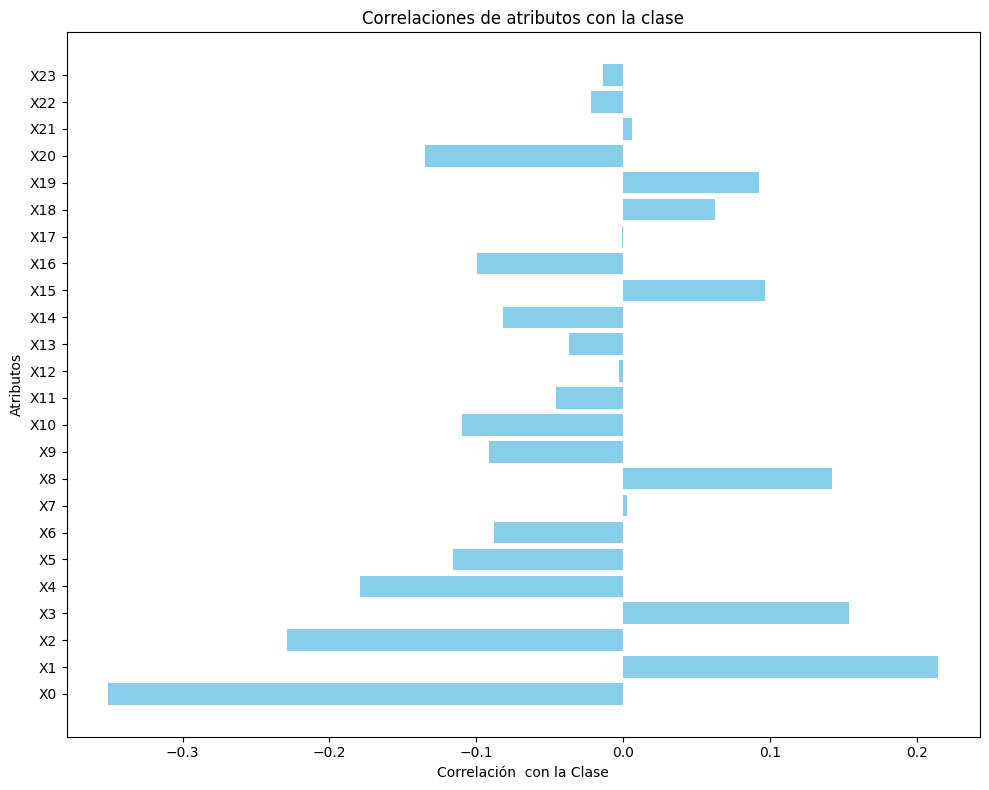

In [59]:
correlation_matrix = df.corr()

class_correlations = correlation_matrix[class_label]

fig, ax = plt.subplots(figsize=(10, 8))
ax.barh(feature_names, class_correlations[feature_names], color='skyblue')
ax.set_xlabel('Correlación  con la Clase')
ax.set_ylabel('Atributos')
ax.set_title('Correlaciones de atributos con la clase')
plt.tight_layout()
plt.show()

Como se aprecia, y juntando con lo que hemos comentado de los histogramas, encontramos que los mejores atributos tras analizar los datos un poco son los siguientes: X0, X1, X2, X3, X4, X8 y X20. Podríamos coger más o menos, pero hemos decidido establecer esos como más importantes.

## **1. Entrenamiento de un modelo y chequeo de su calidad usando 5-fold cross validation**

**La siguiente celda entrena un modelo y lo evalúa en varias particiones training-test diferentes de los datos. El resultado es un score medio junto a su desviación estándar.**

In [ ]:
import math
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=1)
scores = cross_val_score(clf, X, y, cv=5)
print('Precisión en cada una de las particiones: ', scores)
print('Estimación de la precisión por validación cruzada: {:.2f} +/- {:.2f}'.format(scores.mean(), scores.std()))

Precisión en cada una de las particiones:  [0.625 0.665 0.675 0.66  0.63 ]
Estimación de la precisión por validación cruzada: 0.65 +/- 0.02


### **1.1 Responde aquí a las siguientes preguntas:**

**¿Cuál es el tamaño de los conjuntos de entrenamiento y test?**

Para ver cuál es el tamaño de los conjuntos de entrenamiento y test, debemos analizar cómo funciona la función `cross_val_score` por dentro. Explicamos, paso por paso, lo que realiza dicho algoritmo por dentro:

   - Primero, al especificar `cv=5`, se divide el total de los datos especificados en 5 partes iguales, es decir, en partes de tamaño 1000/5 = 200.
   
   - Luego el proceso se repite 5 veces y en cada iteración:

      - Conjunto de entrenamiento: Se utiliza 4 partes para entrenamiento, es decir, 
      80% de los datos, o como número concreto 160 datos.

      - Conjunto de test: Se usa 1 parte, es decir 20% de los datos, o 40 datos.

**¿Se ha usado estratificación en el muestreo o no se ha usado?**

Para responder a esta pregunta, hay que fijarse en la documentación y en como funciona la función `cross_val_score`. Esta es capaz de detectar cuando el estimador es un clasificador. Como en nuestro caso, el estimador es `KNeighborsClassifier` y el argumento `cv` es un entero, por defecto, utiliza `StratifiedKFold`. Esto significa que se asegura de que en cada uno de las 5 partes (contando tanto los datos de entrenamiento y los de test) se mantenga la misma proporción de clases que en el conjunto original.


**¿Cuál es el error del modelo y su variabilidad?**

El código facilitado calcula la precisión del modelo, no el error, por lo tanto, para calcular el error, debemos hacer lo siguiente, tomando que `scores.mean()` es la media de la precisión del modelo en cada partición:
$$Error = 1 - scores.mean()$$

In [166]:
error = 1 - scores.mean()
print('Error del modelo: ', error)

Error del modelo:  0.349


Por último, la variabilidad viene directamente dada por la desviación estándar calculada en el código facilitado. Por lo tanto, y utilizando la salida esta salida `0.65 +/- 0.02`, obtenemos que la desviación estándar es 0.02.

### **1.2 Responde aquí a las siguientes preguntas:**

* **Haz una gráfica que muestre la dependencia de la precisión de un clasificador de vecinos próximos con el número de vecinos. Si es más conveniente, utiliza gráficas en escala logarítmica para alguno de los ejes (`semilogx`, `semilogy`, `loglog`).**

Para ello, creamos primero una función para poder plotear los datos obtenidos de los distintos clasificadores. Hemos decidido fijar la semilla del `cross_val_score` a 13, un número elegido al azar. Este aspecto no solo permite poder reproducir el experimento, si no que además nos asegura de que la comparación entre las distintas configuraciones no se debe a la selección de datos concretos, si no a que de verdad dicha configuración es mejor.

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

all_results = []

def plot_cross_validation(X, y, model_classifier, param_values, title, x_axis, cv = 5, table = False, xticks = True):
    """
    Función que reune los datos de la Validación cruzada para distintos valores de vecinos próximos
    en función del número de vecinos. 
    Genera tanto una tabla con el número de vecinos, la precisión media al realizar validación cruzada,
    el error del modelo y la desviación estándar, así como un gráfico con la precisión como punto y 
    como barra vertical la desviación estándar.
    Args:
        X: set de datos.
        y: set de etiquetas.
        model_classifier: cassificadores a evaluar.
        param_values: valores de los parámetros a evaluar.
        title: título del gráfico.
        x_axis: etiqueta del eje x.
        cv: número de particiones para la validación cruzada.
        table: booleano para mostrar la tabla de resultados.
        xticks: booleano para mostrar las etiquetas en el eje x.
    """
    means =  []
    stds = []
    errors = []
    results = []

    # Iteramos por cada clasificador
    for i, model in enumerate(model_classifier):

        scores = cross_val_score(model, X, y, cv=cv)
        means.append(scores.mean())
        stds.append(scores.std())
        errors.append(1 - scores.mean())
        row = {
            'Número de Vecinos (k)': param_values[i],
            'Precisión Media': scores.mean(),
            'Desviación Std': scores.std(),
            'Error (1-acc)': 1 - scores.mean()
        }
        results.append(row)

    # Convertimos a numpy para facilitar manejo
    means = np.array(means)
    stds = np.array(stds)

    plt.figure(figsize=(10, 6))

    # Ploteamos primero la función de las precisiones
    plt.plot(param_values, means, marker='o', color='blue', label=f'Precisión media')
    
    # Graficar con barras de error
    plt.errorbar(param_values, means, yerr=stds, fmt='o', ecolor='red', capsize=5, linestyle='-', label='Errores estándar')
    plt.title(title)
    plt.xlabel(x_axis)
    plt.ylabel('Precisión (Accuracy)')

    # Añadimos una barra de smáxima precisión
    max_precision = max(means)
    plt.axhline(y=max_precision, color='green', linestyle='--', label=f'Precisión máxima ({max_precision:.4f})')

    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    if xticks:
        plt.xticks(param_values, labels = param_values)
    plt.legend()
    plt.show()

    # Encontramos el mejor valor
    best_idx = np.argmax(means)

    # Mostramos la tabla de resultados si se pide
    if(table):
        df = pd.DataFrame(results)
        display(df)

    return best_idx+1, means[best_idx], stds[best_idx]




* **Utilizando los conceptos de sub- y sobreajuste:**

    Para poder responder correctamente a esta pregunta, primero utilizamos la función anterior para poder basarnos en los datos de la tabla y de la gráfica. Hemos generado dos gráficas, la primera con número de vecinos de 1 a 35 con la tabla correspondiente. Por otro lado, hemos generado una gráfica, sin la tabla para no hacer el notebook exesivamente largo, con valores de 1 a 100 para apreciar más fácilmente qué ocurre para valores más grandes.

    * **Comenta los resultados cuando el número de vecinos es pequeño.**

    Para un número de vecinos pequeño, el modelo asigna la etiqueta basada en un número de datos muy pequeño. Por ejemplo, para número de vecinos 1, el modelo asigna la etiqueta que tenga menor diferencia absoluta frente a los datos de entrenamiento. 

    En nuestro caso, se ha generado sobreajuste. Al tener pocos vecinos, el modelo se ajusta perfectamente a los datos de entrenamiento, sin tener en cuenta posible ruido que estos puedan tener. 
    Esto, visto en la gŕafica, se puede apreciar en que para un menor número de vecinos, la desviación típica es mayor, denotando que el modelo es inestable. A su vez, que el modelo sea inestable significa que dependiendo de la sección de datos que se utilize para entrenarlo, el resultado cambia, por lo que en realidad no se entrena al modelo, si no que se ''aprende de memoria'' cada dato.
    * **Comenta los resultados cuando el número de vecinos es grande.**

    Por otro lado, en la gráfica se aprecia que para valores medios de número de vecinos, la gráfica que la precisión tiende a estabilizarse alrededor del valor máximo. 
    
    Aun así, si seguimos aumentando dicho valor, la precisión vuelve a bajar, aunque la desviación típica sigue disminuyendo. Esto se debe al subajuste, debido al que el modelo pierde la capacidad de capturar detalles locales y los pasa por alto, ignorando posibles patrones sutiles.

    * **Explica el significado del valor de la precisión cuando el número de vecinos toma el valor mayor posible.**

    En el caso en el que $k$ tomase el mayor valor posible, el valor del número de datos de entrenamiento, el algoritmo se fijará en todos los datos para hacer la clasificación de un nuevo punto. De ese modo, al tener en cuenta todos los datos y no poner restricciones de distancia, la decisión será siempre la misma: el clasificador determinará todos los datos como el de la clase mayoritaria en los datos de entrenamiento. Por lo tanto, la precisión deja de ser un reflejo visual de la precisión real del modelo y pasa a ser un reflejo del porcentaje de la clase mayoritaria.

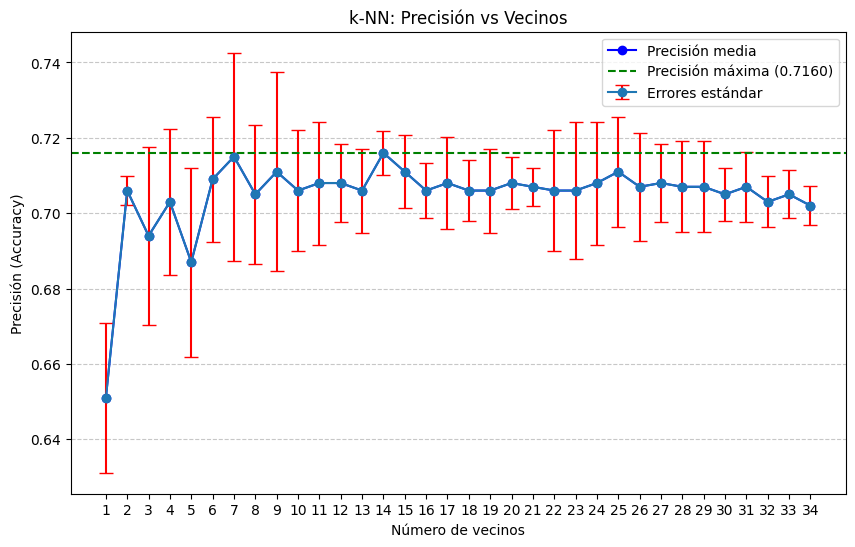

,Número de Vecinos (k),Precisión Media,Desviación Std,Error (1-acc)
0,1,0.651,0.019849,0.349
1,2,0.706,0.003742,0.294
2,3,0.694,0.023537,0.306
3,4,0.703,0.019391,0.297
4,5,0.687,0.025020,0.313
5,6,0.709,0.016553,0.291
6,7,0.715,0.027568,0.285
7,8,0.705,0.018439,0.295
8,9,0.711,0.026344,0.289
9,10,0.706,0.015937,0.294


(np.int64(14), np.float64(0.716), np.float64(0.0058309518948453055))

In [233]:
num_neighbors = 35
knn_classifiers = [KNeighborsClassifier(n_neighbors=n) for n in range(1, num_neighbors)]
plot_cross_validation(X, y, knn_classifiers, range(1,num_neighbors), 'k-NN: Precisión vs Vecinos', 'Número de vecinos', table= True)

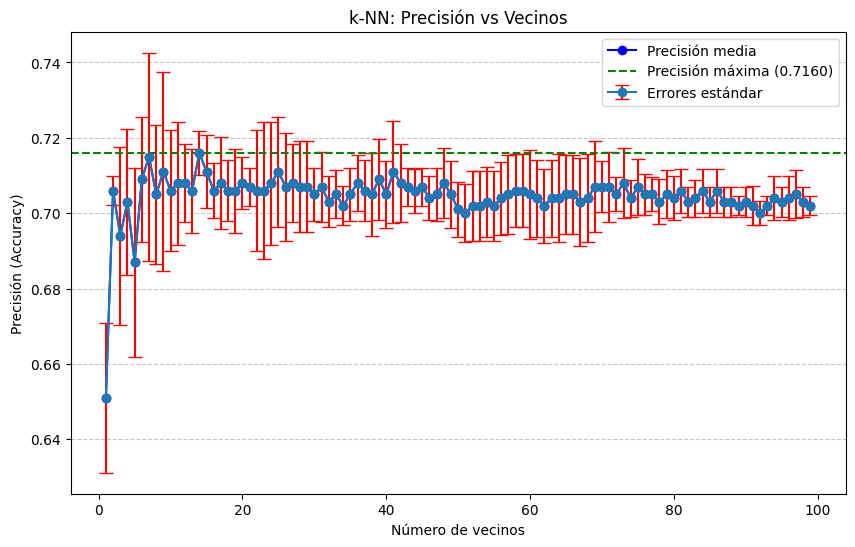

,Número de Vecinos (k),Precisión Media,Desviación Std,Error (1-acc)
0,1,0.651,0.019849,0.349
1,2,0.706,0.003742,0.294
2,3,0.694,0.023537,0.306
3,4,0.703,0.019391,0.297
4,5,0.687,0.025020,0.313
...,...,...,...,...
94,95,0.703,0.004000,0.297
95,96,0.704,0.005831,0.296
96,97,0.705,0.006325,0.295
97,98,0.703,0.004000,0.297


In [10]:
num_neighbors = 100
knn_classifiers = [KNeighborsClassifier(n_neighbors=n) for n in range(1, num_neighbors)]
max_index_knn , max_prec_knn, max_std_knn = plot_cross_validation(X, y, knn_classifiers, range(1,num_neighbors), 'k-NN: Precisión vs Vecinos', 'Número de vecinos', table= True, xticks = False)

* **¿Cuál es la mejor precisión que se alcanza con k-nn y para qué k (valor de `n_neighbours`)?**

Eso lo obtenemos directamente de la salida función `plot_cross_validation`.

In [235]:
print(f"La mejor precisión con k-nn es {max_prec_knn} con número de vecinos {max_index_knn}")

La mejor precisión con k-nn es 0.716 con número de vecinos 14


* **¿Cuál es la mejor precisión que se alcanza con un árbol de decisión y con qué profundidad máxima (valor de `max_depth`)? Para ello, haz una gráfica que muestre la dependencia de la precisión con la profundidad máxima del árbol. Comenta los resultados.**

Para responder a esta pregunta, vamos a seguir el mismo proceso que en los apartados anteriores. Como se aprecia tanto en la tabla como en la gráfica, aunque también podríamos obtenerlo directamente con la salida de la función, obtenemos que la mejor precisión que se alcanza con un árbol de decisión es $0.730$ para `max_depth` 4.

En el caso del árbol pasa lo contrario de lo que nos pasaba con el modelo de vecinos. Para una profundidad muy baja, el árbol no tiene capacidad suficiente para entender la complejidad de los datos y predecir correctamente (subajuste). Para valores intermedios, el árbol es suficientemente complejo como para poder capturar la realidad de los datos y predecir correctamente, mientras que si el valor es muy alto se genera sobreajuste y la precisión parece que se estabiliza, decayendo, y estabilizandose para la precisión 0.701. Esto se debe a que el modelo comienza a ser demasiado específico en los nodos de decisión y por tanto, la desviación típica aumenta, por lo explicado anteriormente. Además, el aumento de la profundidad no afecta a la precisión para número suficientemente altos, ya que el árbol ya ha aprendido todo lo que podía aprender de los datos.

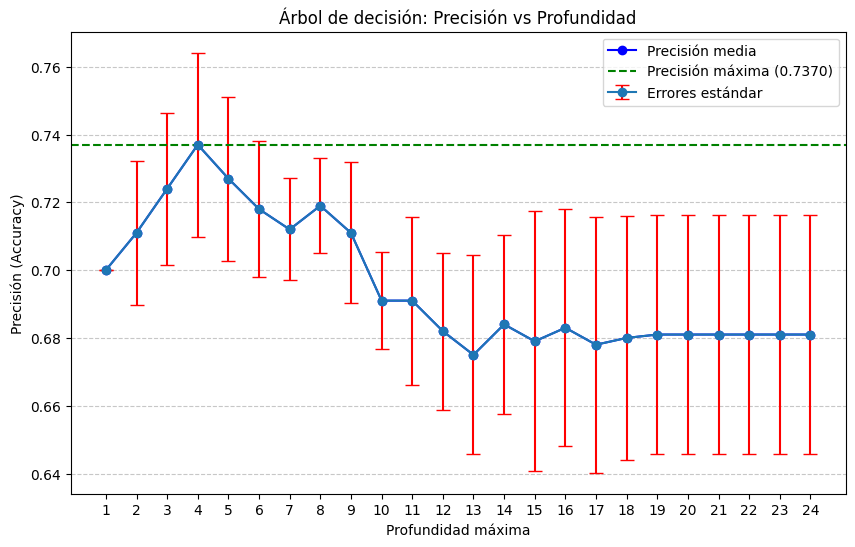

,Número de Vecinos (k),Precisión Media,Desviación Std,Error (1-acc)
0,1,0.700,0.000000,0.300
1,2,0.711,0.021307,0.289
2,3,0.724,0.022450,0.276
3,4,0.737,0.027129,0.263
4,5,0.727,0.024207,0.273
5,6,0.718,0.020149,0.282
6,7,0.712,0.015033,0.288
7,8,0.719,0.013928,0.281
8,9,0.711,0.020833,0.289
9,10,0.691,0.014283,0.309


In [21]:
from sklearn.tree import DecisionTreeClassifier
depth = 25
classifiers = [DecisionTreeClassifier(max_depth=n, random_state=13) for n in range(1, depth)]
max_index_tree , max_prec_tree , max_std_tree = plot_cross_validation(X, y, classifiers, range(1,depth), 'Árbol de decisión: Precisión vs Profundidad', 'Profundidad máxima', table= True)

* **¿Cuál es la mejor precisión que se alcanza con una red neuronal con una sola capa oculta y con qué configuración (valor de `hidden_layer_sizes`)? Para ello, haz una gráfica que muestre la dependencia de la precisión con el número de nodos en la capa oculta. Comenta los resultados.**

Para realizar este apartado, primero hemos decidido modificar `max_iter` de la red neuronal para asegurarnos de que el entrenamiento es exitoso, estableciendolo a 6000. Una vez comentado esto, queremos realizar pruebas para ver qué configuración de la capa oculta, es decir, qué número de neuronas de la capa oculta, determina una mejor precisión. 

Para ello, generamos tuplas de diferentes elementos de modo que (50,) es un capa de 50 neuronas y (20,) es un capa de 20. De la gráfica obtenemos justo lo esperado, la precisión aumenta comforme el número de neuronas aumenta. Aun así, cuando el número de neuronas aumenta mucho, vuelve a suceder el sobreajuste y deriva en un aumento de coste computacional sin ver mejoría en la precisión. Por ello, hemos decidido tomar como mejor tamaño 30 neuronas, porque aunque la precisión para los valores de 30,40 y 60 neuronas sea la misma, no solo es la que tiene menor desviación típica, lo que hace que el modelo sea más estable, si no la que conlleva menor coste.


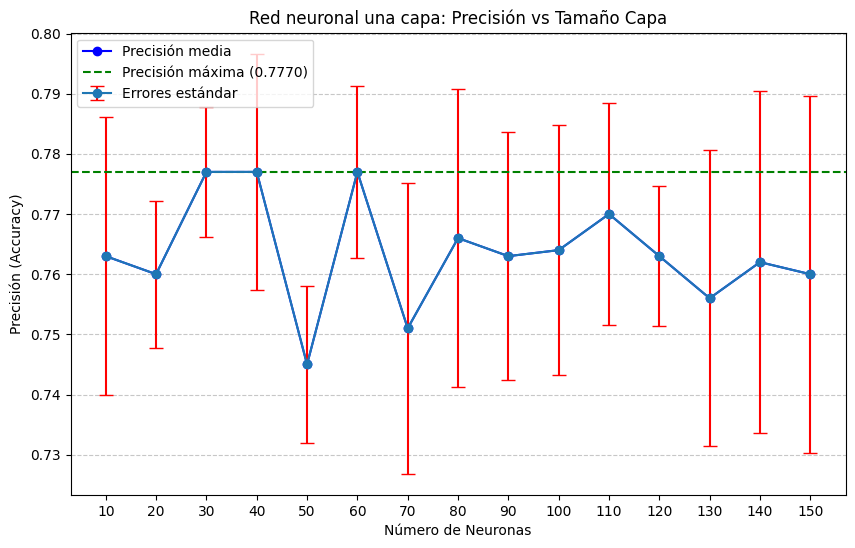

,Número de Vecinos (k),Precisión Media,Desviación Std,Error (1-acc)
0,10,0.763,0.023152,0.237
1,20,0.760,0.012247,0.240
2,30,0.777,0.010770,0.223
3,40,0.777,0.019647,0.223
4,50,0.745,0.013038,0.255
5,60,0.777,0.014353,0.223
6,70,0.751,0.024166,0.249
7,80,0.766,0.024779,0.234
8,90,0.763,0.020640,0.237
9,100,0.764,0.020833,0.236


In [27]:
from sklearn.neural_network import MLPClassifier
max_layer = 150
classifiers = [MLPClassifier(hidden_layer_sizes=(n,), max_iter=6000, random_state=13) for n in range(10, max_layer + 1, 10)]
max_index_one_layer , max_prec_one_layer, max_std_one_layer = plot_cross_validation(X, y, classifiers, range(10, max_layer + 1, 10), 'Red neuronal una capa: Precisión vs Tamaño Capa', 'Número de Neuronas', table= True)

* **¿Cuál es la mejor precisión que se alcanza con una red neuronal con varias capas ocultas y con qué configuración? Para ello, haz una gráfica que muestre la dependencia de la precisión con el número de capas ocultas, suponiendo constante el número de nodos en cada capa oculta. Comenta los resultados.** 

Para este apartado realizamos algo parecido a lo realizado en el ejercicio anterior, pero en vez de modificar el número (n,), modificamos el número de capas ocultas. En cuanto al tamaño de dichas capas, hemos decidido probar para varios tamaños, ya que el haber obtenido que la mejor configuración para 1 capa sea 30 no determina la posible mejor configuración con respecto al número de capas al facilitar el sobreajuste.

Con los datos obtenidos deducimos que aumentar las capas permite al modelo adaptarse de modo más complejo. Aun así, al igual que en el resto de casos que hemos trabajado, tienden a sobreajustar. Por lo que, aun aumentando el número de capas, si el problema no es muy complicado, la precisión no solo se queda constante, si no que se reduce. Con los datos de la tabla llegamos a la conclusión de que la mejor configuración es justo la obtenida en el apartado anterior, es decir, una sola capa con 30 neuronas. Este aspecto lo comentamos más a fondo en el apartado siguiente de conclusiones.

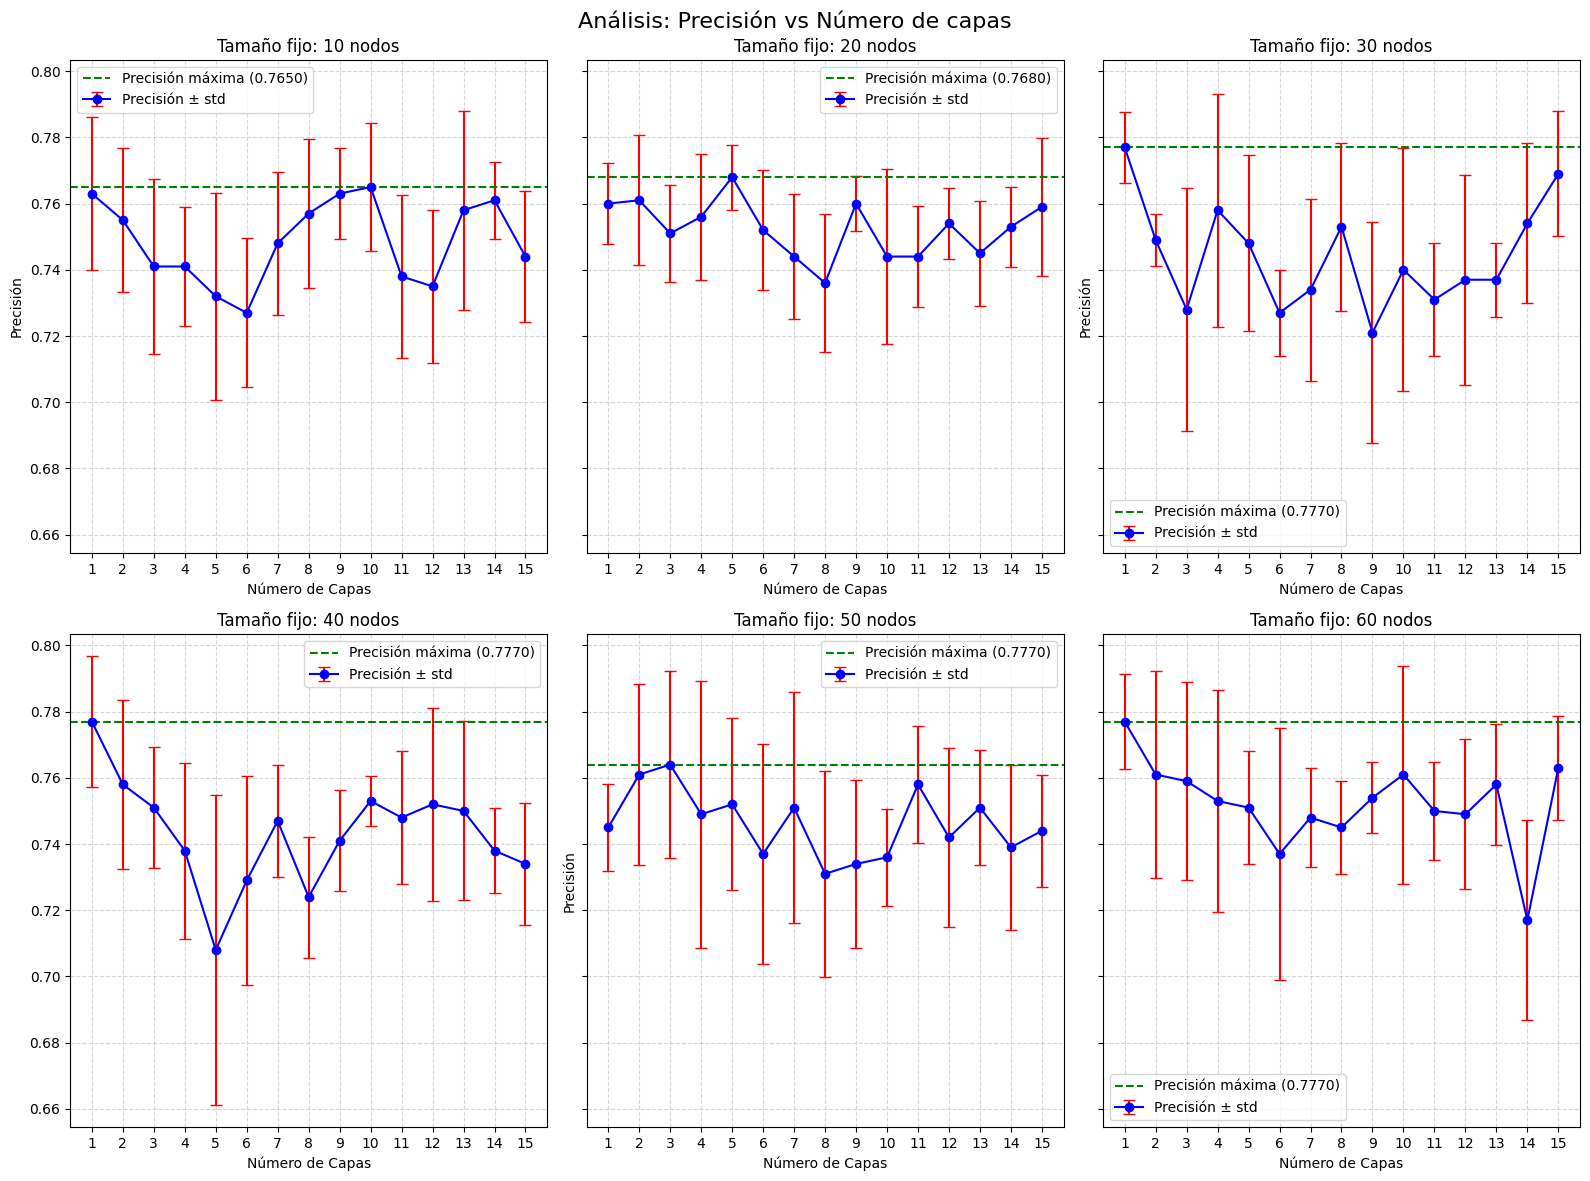

Ganador: MLP Multicapa (30 neuronas x 1 capas) con precisión 0.7770


In [241]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score

# Establecemos primero los valores con los que queremos trabajar
nodos_a_probar = [10, 20, 30, 40, 50, 60]
max_capas = 15
capas_range = range(1, max_capas + 1)

# Variables para guardar la mejor configuración de las utilizadas
best_global_score = -1
best_global_std = 0
best_global_config = ""

fig, axes = plt.subplots(2, math.ceil(len(nodos_a_probar)/2), figsize=(16, 12), sharey=True)
axes = axes.flatten()

for i, nodos in enumerate(nodos_a_probar):
    means = []
    stds = []
    
    # Bucle de capas
    for n_capas in capas_range:
        config = tuple([nodos] * n_capas)
        clf = MLPClassifier(hidden_layer_sizes=config, max_iter=6000, random_state = 13)
        scores = cross_val_score(clf, X, y, cv=5)
        
        means.append(scores.mean())
        stds.append(scores.std())
    
    means = np.array(means)
    stds = np.array(stds)
    
    # Buscamos el mejor de este gráfico actual
    idx_best_local = np.argmax(means)
    score_local = means[idx_best_local]
    
    # Si este local es mejor que el global, actualizamos las variables
    if score_local > best_global_score:
        best_global_score = score_local
        best_global_std = stds[idx_best_local]

        # Guardamos el nombre de la configuración ganadora
        best_global_config = f"{nodos} neuronas x {capas_range[idx_best_local]} capas"

    # Ploteamos la información
    ax = axes[i]
    ax.errorbar(capas_range, means, yerr=stds, fmt='-o', capsize=4, 
                ecolor='red', color='blue', label='Precisión ± std')
    
    # Marcamos el máximo local
    ax.axhline(y=score_local, color='green', linestyle='--', label=f'Precisión máxima ({best_global_score:.4f})')

    ax.set_title(f"Tamaño fijo: {nodos} nodos")
    ax.set_xlabel("Número de Capas")
    ax.set_xticks(capas_range)
    ax.grid(True, linestyle='--', alpha=0.5)
    if i % 2 == 0: ax.set_ylabel("Precisión")
    ax.legend()

plt.suptitle("Análisis: Precisión vs Número de capas", fontsize=16)
plt.tight_layout()
plt.show()

print(f"Ganador: MLP Multicapa ({best_global_config}) con precisión {best_global_score:.4f}")

* **Resume los resultados y conclusiones del estudio realizado.**

Para realizar una conclusión, creamos una tabla con los datos de la mejor estrategia, así como de la configuración que la genera. Primero recuperamos toda la información obtenida en las ejecuciones anteriores. Después, imprimimos la tabla para ver todos los datos conjuntos.

In [242]:
all_results =  []
row = {
    'Estrategia': f'kNN con {max_index_knn} vecinos',
    'Precisión Media': max_prec_knn,
    'Desviación Std': max_std_knn,
    'Error (1-acc)': 1 - max_prec_knn
    }
all_results.append(row)

row = {
    'Estrategia': f'Árbol con profundidad {max_index_tree}',
    'Precisión Media': max_prec_tree,
    'Desviación Std': max_std_tree,
    'Error (1-acc)': 1 - max_prec_tree
    }

all_results.append(row)

row = {
    'Estrategia': f'Red neuronal con {max_index_one_layer*10} neuronas',
    'Precisión Media': max_prec_one_layer,
    'Desviación Std': max_std_one_layer,
    'Error (1-acc)': 1 - max_prec_one_layer
    }
all_results.append(row)

row = {
    'Estrategia': f'Red neuronal multicapa: {best_global_config}',
    'Precisión Media': best_global_score,
    'Desviación Std': best_global_std,
    'Error (1-acc)': 1 - best_global_score
    }
all_results.append(row)

df = pd.DataFrame(all_results)
display(df)

,Estrategia,Precisión Media,Desviación Std,Error (1-acc)
0,kNN con 14 vecinos,0.716,0.005831,0.284
1,Árbol con profundidad 4,0.737,0.027129,0.263
2,Red neuronal con 30 neuronas,0.777,0.010770,0.223
3,Red neuronal multicapa: 30 neuronas x 1 capas,0.777,0.010770,0.223


Fijándonos en los datos de las tablas, en concreto en la precisión media y en la desviación estándar hemos llegado a las siguientes conclusiones:

- Los modelos no lineales, es decir, la red neuronal, ofrece un rendimiento significativamente más alto frente a los modelos kNN y el árbol de decisión. Esta diferencia se podría deber a la complejidad de los datos. Los modelos simples no presentan suficiente capacidad de extracción de representación, sufriendo el ya comentado subajuste en comparación con las redes neuronales.

- Por otro lado, observamos algo curioso, tanto en la comparación de modelos unicapa frente a las redes neuronales multicapa, hemos obtenido que la mejor configuración es la unicapa con 30 neuronas. Se aprecia en los datos de las tablas que incluso simulando la misma configuración (30 neuronas x 1 capa) en momentos distintos obtenemos exactamente los mismos datos, lo que denota que el experimento está realizandose correctamente. Esto puede llegar a ser contraintuitivo, ya que solemos pensar que conforme más complejo, mejor. Reflexionando sobre el motivo por el que la unicapa puede ser mejor hemos llegado a estas conclusiones:

    * Sabemos que una red neuronal de suficientes neuronas puede aproximar cualquier función continua con la precisión que se desee. Por lo tanto, teoricamente no es necesario la profundidad.
    
    * En el caso de las redes neuronales profundas, se puede dar el sobreajuste. Es decir, al tener muchísimos más parámetros que ajustar, y al tener la red tanta capacidad de memoria, puede ser que el modelo acabe memorizando los datos en lugar de predeciendo correctamente. 

Por lo tanto, obtenemos que el modelo necesita de una capacidad de modelado no lineal de una red neuronal. Además, confirma que añadir más capas y hacer redundante el modelo no mejora la precisión. 

## **2. Procesamiento**

**En ocasiones, en lugar de utilizar modelos más complejos, es más útil invertir más tiempo en el procesamiento de los datos para conseguir mejores resultados. Sin embargo, es importante evitar errores comunes como el goteo de información. Puedes obtener más información sobre buenas prácticas en: https://scikit-learn.org/stable/common_pitfalls.html**

**En este apartado debes investigar mecanismos para preparar los datos y obtener (en principio) mejores resultados. Explora al menos los siguientes mecanismos:**

   * **Construcción y selección de atributos.**

  La construcción de atributos es el proceso de usar el conocimiento del dominio (o técnicas matemáticas) para transformar los datos brutos en características que representen mejor el problema subyacente. El objetivo es facilitar al modelo la detección de patrones y es necesario ya que hay muchos modelos que no son capaces de entender relaciones complejas por sí mismos. Entre técnicas utilizadas normalmente se encuentran: transformaciones de dominio, binning o discretización, características polinómicas...
  
   En cuanto a la selección de atributos es el proceso de elegir un subconjunto de las características más relevantes para usar en la construcción del modelo, descartando las redundantes o irrelevantes (ruido). Esto es necesario para evitar problemas de dimensionalidad, al tener muchos atributos pero pocos datos, para mejorar el rendimiento o por interpretabilidad, entre otras cosas.

   * **Preprocesamiento:**

     * **Detección de outliers:** este proceso detecta aquellos elementos, o valores, extremos que desvian la media. Para llevar a cabo este proceso, en vez de eliminar directamente los valores extremos, y por ende, reducir el tamaño del dataset, es mejor hacer uso de herramientas como `RobustScaler`, que escala utilizando el rango intercuartílico, minimizando el impacto de los outliers.

     * **Missing values:** hay veces que no tenemos todos los datos para todas las observaciones. Este aspecto es un problema a la hora de entrenar ciertos modelos, por ello, es un buena práctica sustituir dichos valores faltantes por la mediana, y no la media, para ser más robustos frente a outliers.

     * **Escalado (normalización) y centrado (estandarización):** estos aspectos son necesarios ya que si no, debido a la diferencia de escala entre las variables, aquellas de mayor magnitud dominarán sobre aquellas con menor magnitud. A su vez, si no realizamos el centrado correctamente, si un atributo tiene valores mayores, sin importar el rango o variabilidad de estos, este tendrá también más peso frente a otro atributo que tome valores más pequeños.

**Razona por qué decides probar o ignorar alguno de estos métodos, y cómo cambian los resultados al aplicarlos (puedes crear tantas celdas como consideres oportunas). Además, explica la metodología utilizada para seguir unas buenas prácticas.**

Para ilustrar la utilidad de los métodos utilizados, hemos decidido hacer gráficas de comparación de la precisión frente a las diferentes combinaciones de procesamiento de datos. Dichas gráficas están ejecutadas justamente después. 

Además, para seguir una buena práctica, hemos decidido hacer uso de los pipelines de `scikit-learn`. Esto permite evitar el goteo de información (o Data Leakage). Este error es muy común al hacer preprocesamiento de datos y se da por ejemplo al calcular estadísticas globales utilizando todo el conjunto de datos antes de dividirlo, causando una contaminación de los datos de entrenamiento con los datos del test. Para evitarlo, seguimos el siguiente proceso:
- Encapsulamiento: primero encapsulamos cada proceso de preprocesamiento junto con el modelo dentro de un objeto Pipeline (se ve claramente cómo hacerlo en la celda de código inferior).

- Aislamiento: durante la validación cruzada, el preprocesamiento de datos ocurre unicamente con los folds de entrenamiento.


Justificamos ahora nuestras decisiones de utilización de los mecanismos:
- Missing values: hemos decidido no incluirlo, ya en la espeficación de la base de datos nos determina que la base de datos no tiene Missing Values.

- Centrado y escalado:  para ello, hacemos uso de `StandardScaler`, `RobustScaler` y los comparamos para ver cual de ellos tiene mejor resultado. Hemos decidido no probar con el `MinMaxScaler` ya que no es una buena práctica para conjuntos de datos con outliers y con conjuntos de datos que no sigan una distribución normal. Al no tener datos aparentes del funcionamiento de los datos, hemos decidio no utilizarlo.
 
Para ello, analizaremos el mismo tipo de transformaciones para los mejores modelos obtenidos en el apartado anterior para poder, al final, determinar el mejor modelo con el mejor preprocesamiento de datos. En el código, así como en los comentarios posteriores a las simulaciones, concretamos el tipo de transformaciones que hemos realizado.

Además, hemos decidido fijar la semilla en 13, para poder reproducir el experimento y para tener una comparación más fiel y asegurarnos que las variabilidades entre los mecanismos no se deben a semillas que ''facilitan'' o ''mejoran'' el tratamiento de datos concreto.

## Búsqueda de vecinos próximos (kNN) de 12 vecinos

,Estrategia,Precisión media,Desviación Std,Error (1-acc)
0,Sin proprocesamiento,0.716,0.005831,0.284
1,Estandarización,0.732,0.006000,0.268
2,Robust Scaler,0.728,0.010770,0.272
3,Ingeniería Atributos,0.718,0.022935,0.282


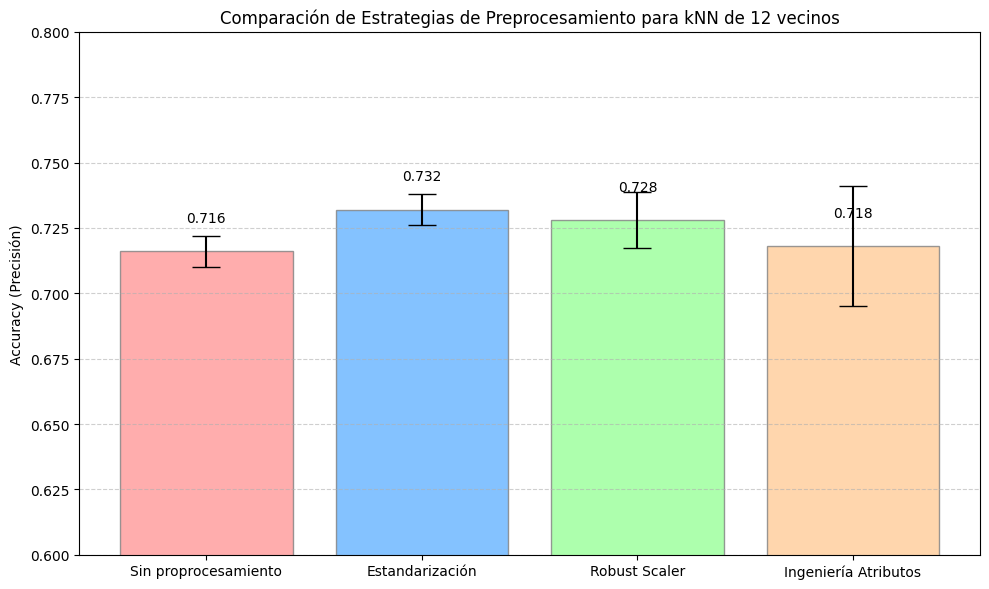

In [243]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler, PolynomialFeatures
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import VarianceThreshold

# Definición de los Pipelines
# Calculamos el normal, sin preprocesamiento de datos para comparar con el resto
pipe_base = Pipeline([
    ('model', KNeighborsClassifier(n_neighbors = max_index_knn))
])

# Estandarización utilizando la media y la desviación típica
pipe_std = Pipeline([
    ('scaler', StandardScaler()),
    ('model', KNeighborsClassifier(n_neighbors = max_index_knn))
])

# Manejo de Outliers con el Robust Scaler: utilizando la mediana y el rango intercuartílico
pipe_robust = Pipeline([
    ('scaler', RobustScaler()),
    ('model', KNeighborsClassifier(n_neighbors = max_index_knn))
])

# Ingeniería de Atributos Completa: donde primero generamos polinomios, escalamos, 
# seleccionamos los mejores atributos y por último entrenamos al modelo
pipe_feature_eng = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('filter_constant', VarianceThreshold(threshold=0)),
    ('scaler', StandardScaler()),
    ('selector', SelectKBest(f_classif, k=15)),
    ('model', KNeighborsClassifier(n_neighbors = max_index_knn))
])

pipelines = [
    ('Sin proprocesamiento', pipe_base),
    ('Estandarización', pipe_std),
    ('Robust Scaler', pipe_robust),
    ('Ingeniería Atributos', pipe_feature_eng)
]

results_mean = []
results_std = []
names = []

results = []
for name, pipe in pipelines:

    scores = cross_val_score(pipe, X, y, cv=5)
    
    results_mean.append(scores.mean())
    results_std.append(scores.std())
    names.append(name)
    
    # Guardamos los datos para las tablas
    row = {
        'Estrategia': name,
        'Precisión media': scores.mean(),
        'Desviación Std': scores.std(),
        'Error (1-acc)': 1 - scores.mean()
    }
    results.append(row) 


# Graficamos los resultados
plt.figure(figsize=(10, 6))
bars = plt.bar(names, results_mean, yerr=results_std, capsize=10, 
               color=['#ff9999','#66b3ff','#99ff99','#ffcc99'], alpha=0.8, edgecolor='grey')

plt.ylabel('Accuracy (Precisión)')
plt.title('Comparación de Estrategias de Preprocesamiento para kNN de 12 vecinos')
plt.ylim(0.6, 0.8)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Añadir etiquetas de valor
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 3), ha='center', va='bottom')

df = pd.DataFrame(results)
display(df)
plt.tight_layout()
plt.show()

Comentamos ahora los resultados obtenidos. Como era de esperar, el caso base obtiene la peor precisión de entre los demás.

Se ve claramente que la estrategia de Estandarización es la ganadora no solo con respecto a la precisión si no también con respecto a la desviación estándar. Esto se debe a que la estrategia kNN se basa, como ya hemos comentado anteriormente en el notebook en la distancia Euclídea entre dos puntos. De este modo, para datos no estandarizados, las variables grandes dominan en la suma de la distancia con respecto aquellas más pequeñas. Al estandarizar, igualamos la influencia de todas las variables, permitiendo que cada atributo aporte de igual modo al modelo. 

Por otro lado, vemos que el Robust Scaler obtiene menos precisión que la Estandarización, aspecto que a primeras puede ser contraintuitivo. Se puede debe a que el Robust Scaler, como ya hemos comentado, utiliza la  mediana y los rangos intercuartílicos para hacer la normalización, por lo tanto, que sea peor sugiere que en nuestro conjunto de datos los valores extremos continen información valiosa para la clasificación y no son únicamente outliers. Al utilizar el escalado robusto, hemos comprimido demasiado esta información, perdiendo información útil. Como la estandarización clásica tiene en cuenta todos los puntos, representa mejor el problema.

Por último, la ingeniería de atributos no aportó mejora al Robust Scaler. Esta obtención de precisión se debe al problema de la dimensionalidad de kNN. Al utilizar `PolynomialFeatures`, añadimos nuevas variables polinómicas, expandiendo el espacio de búsqueda. En espacios de muchas dimensiones, los puntos comienzan a estar más lejos de cada uno, haciendo más dificil la correcta predección. Por lo tanto, añadir complejidad, no derivó en un mejor modelo, dejando claro que no solo importa la complejidad, si no como de bien se adapte el modelo a los datos.

Además, hemos decidido realizar ahora, dado que el mejor proceso de preprocesamiento ha sido la estandarización, realizar un estudio de selección de atributos. Para ello, hemos decidido utilizar `SelectKBest` con la función `f_classif`, que calcula la correlación entre cada atributo y la clase. De este modo, seleccionamos los k mejores atributos para entrenar el modelo. Hemos decidido probar con k=5,10,15 y 20 (todos los atributos).

,Estrategia,Precisión media,Desviación Std,Error (1-acc)
0,SelectKBest (k=5),0.729,0.023324,0.271
1,SelectKBest (k=10),0.732,0.019900,0.268
2,SelectKBest (k=15),0.729,0.010677,0.271
3,SelectKBest (k=20),0.723,0.017776,0.277


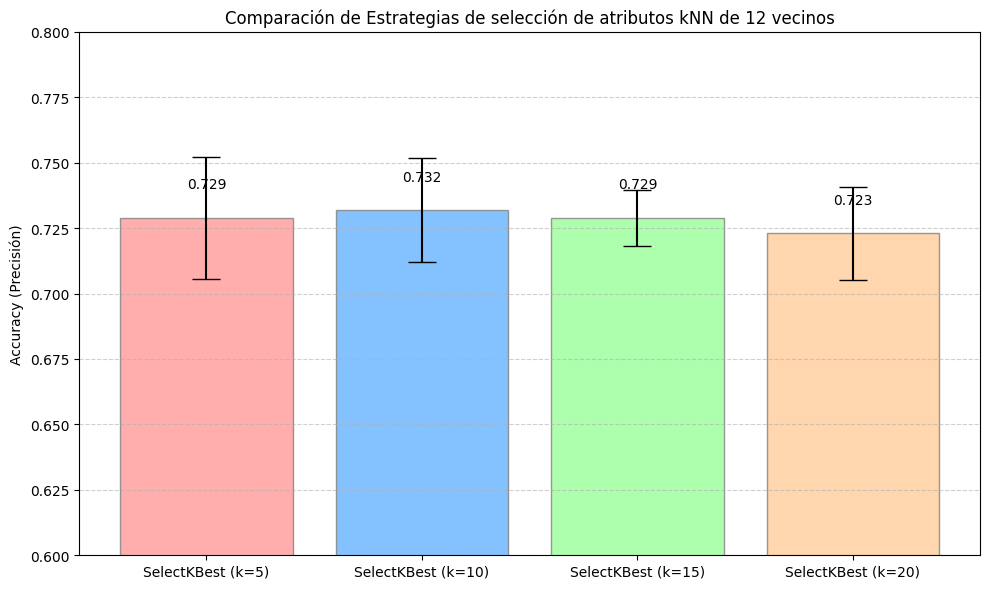

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler, PolynomialFeatures
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import VarianceThreshold

# Lista de valores de atributos a probar
valores_k = [5, 10, 15,20]
pipelines = []

for k in valores_k:
    # Establecemos el nombre que aparecerá en la gráfica
    nombre_pipe = f'SelectKBest (k={k})'
    
    # Creamos el pipeline que se quedará con los k mejores atributos
    pipe_temp = Pipeline([
        ('scaler', StandardScaler()),
        ('selector', SelectKBest(f_classif, k=k)),
        ('model', KNeighborsClassifier(n_neighbors=max_index_knn))
    ])
    
    pipelines.append((nombre_pipe, pipe_temp))

results_mean = []
results_std = []
names = []

results = []
for name, pipe in pipelines:

    scores = cross_val_score(pipe, X, y, cv=5)
    
    results_mean.append(scores.mean())
    results_std.append(scores.std())
    names.append(name)
    
    # Guardamos los datos para las tablas
    row = {
        'Estrategia': name,
        'Precisión media': scores.mean(),
        'Desviación Std': scores.std(),
        'Error (1-acc)': 1 - scores.mean()
    }
    results.append(row) 


# Graficamos los resultados
plt.figure(figsize=(10, 6))
bars = plt.bar(names, results_mean, yerr=results_std, capsize=10, 
               color=['#ff9999','#66b3ff','#99ff99','#ffcc99'], alpha=0.8, edgecolor='grey')

plt.ylabel('Accuracy (Precisión)')
plt.title('Comparación de Estrategias de selección de atributos kNN de 12 vecinos')
plt.ylim(0.6, 0.8)
plt.grid(axis='y', linestyle='--', alpha=0.6)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 3), ha='center', va='bottom')

df = pd.DataFrame(results)
display(df)
plt.tight_layout()
plt.show()

Por lo tanto, se ve que la selección de atributos mejora ligeramente la precisión del modelo, de 0.723 con todos los atributos a 0.732 con 10 atributos. Esto confirma nuestra hipótesis inicial de que no hace falta utilizar todos los atributos, si no que es mejor quedarse con aquellos que más información aportan, es decir, aquellos que más correlación tienen con la clase. Por lo tanto, la mejor estrategia de preprocesamiento para el caso de la búsqueda de vecinos es la de estandarización junto con la selección de atributos, quedándonos con los 10 mejores atributos, terminando con una precisión de 0.732.

## Árboles de decisión profundidad 4

,Estrategia,Precisión media,Desviación Std,Error (1-acc)
0,Sin preprocesamiento,0.737,0.027129,0.263
1,Estandarización,0.737,0.027129,0.263
2,Robust Scaler,0.737,0.027129,0.263
3,Ingeniería Atributos,0.710,0.040620,0.290


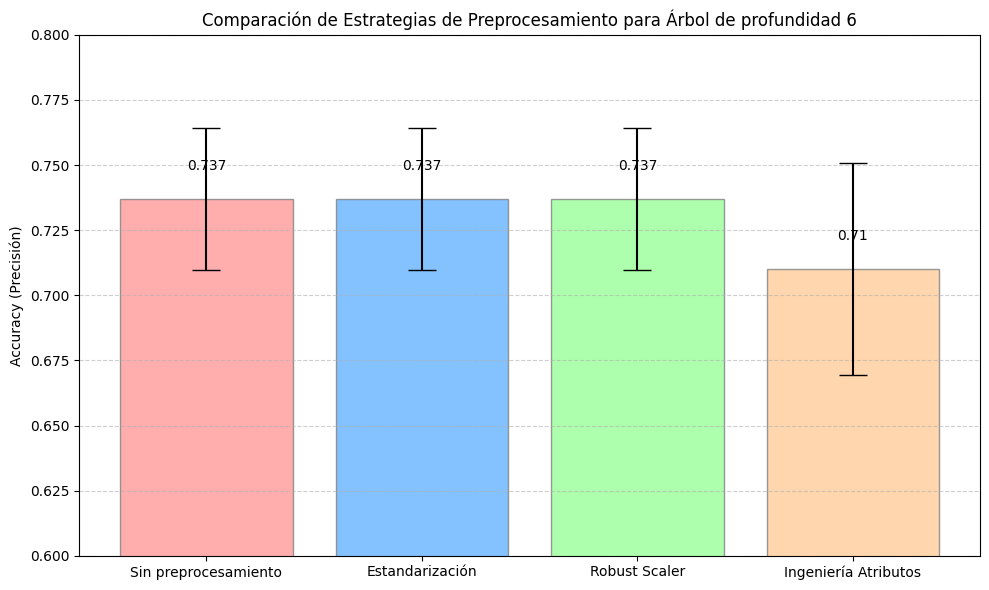

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler, PolynomialFeatures
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import VarianceThreshold

# Definición de los Pipelines
# Calculamos el normal, sin preprocesamiento de datos para comparar con el resto
pipe_base = Pipeline([
    ('model', DecisionTreeClassifier(max_depth= max_index_tree, random_state = 13))
])

# Estandarización utilizando la media y la desviación típica
pipe_std = Pipeline([
    ('scaler', StandardScaler()),
    ('model', DecisionTreeClassifier(max_depth= max_index_tree,random_state = 13))
])

# Manejo de Outliers con el Robust Scaler: utilizando la mediana y el rango intercuartílico
pipe_robust = Pipeline([
    ('scaler', RobustScaler()),
    ('model', DecisionTreeClassifier(max_depth= max_index_tree,random_state = 13))
])

# Ingeniería de Atributos Completa: donde primero generamos polinomios, escalamos, 
# seleccionamos los mejores atributos y por último entrenamos al modelo
pipe_feature_eng = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('filter_constant', VarianceThreshold(threshold=0)),
    ('scaler', StandardScaler()),
    ('selector', SelectKBest(f_classif, k=15)),
    ('model', DecisionTreeClassifier(max_depth=max_index_tree, random_state = 13))
])

pipelines = [
    ('Sin preprocesamiento', pipe_base),
    ('Estandarización', pipe_std),
    ('Robust Scaler', pipe_robust),
    ('Ingeniería Atributos', pipe_feature_eng)
]

results_mean = []
results_std = []
names = []

results = []
for name, pipe in pipelines:

    scores = cross_val_score(pipe, X, y, cv=5)
    
    results_mean.append(scores.mean())
    results_std.append(scores.std())
    names.append(name)
    
    # Guardamos los datos para las tablas
    row = {
        'Estrategia': name,
        'Precisión media': scores.mean(),
        'Desviación Std': scores.std(),
        'Error (1-acc)': 1 - scores.mean()
    }
    results.append(row) 


# Graficamos los resultados
plt.figure(figsize=(10, 6))
bars = plt.bar(names, results_mean, yerr=results_std, capsize=10, 
               color=['#ff9999','#66b3ff','#99ff99','#ffcc99'], alpha=0.8, edgecolor='grey')

plt.ylabel('Accuracy (Precisión)')
plt.title(f'Comparación de Estrategias de Preprocesamiento para Árbol de profundidad {max_index_tree}')
plt.ylim(0.6, 0.8)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Añadir etiquetas de valor
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 3), ha='center', va='bottom')

df = pd.DataFrame(results)
display(df)
plt.tight_layout()
plt.show()

Comentamos ahora los resultados obtenidos. Es curioso que los modelos sin reprocesamiento, de estandarización y Robust Scaler obtengan exactamente los mismos datos, tanto de precisión como de desviación típica mientras que la de ingeniería de atributos obtiene pequeñas modificaciones. Esto se debe a que los árboles de decisión son invariantes a transformaciones monótonas. Es decir, un árbol toma decisiones en base a unos umbrales, si aplicamos un escalado, el órden de los datos no cambiará, el árbol simplemente ajusta su umbral al nuevo valor, por lo que la separación de decisiones, los puntos de corte, separan las mismas muestras, por lo que el árbol resultante es matemáticamente idéntico. Luego, en caso de utilizar un modelo en árbol, gastar recursos para el preprocesamiento es un gasto. 

Aun así, como ya hemos comentado antes, para el caso de ingeniería de atributos, si que vemos una variación en la precisión. Esto se debe a que al utilizar `PolynomialFeatures`, hemos creado muchas variables nuevas. Como el modelo del árbol de decisión es un algoritmo ''greedy'', es decir, que construyen el modelo paso a paso, eligiendo en cada nodo la variable que mejor separa los datos, es posible que el árbol haya seleccionado una de estas nuevas variables que podía parecer buena, pero que en realidad no generalizase bien todos los datos, si no solo los de entrenamiento.

Al igual que en el caso de kNN, hemos decidido realizar un estudio de selección de atributos. Para ello, hemos decidido utilizar `SelectKBest` con la función `f_classif`, que calcula la correlación entre cada atributo y la clase. De este modo, seleccionamos los k mejores atributos para entrenar el modelo. En este caso, como la estandarización no aporta nada, hemos decidido no incluirla en el pipeline.

,Estrategia,Precisión media,Desviación Std,Error (1-acc)
0,SelectKBest (k=5),0.747,0.013638,0.253
1,SelectKBest (k=10),0.742,0.022494,0.258
2,SelectKBest (k=15),0.744,0.023537,0.256
3,SelectKBest (k=20),0.735,0.030659,0.265


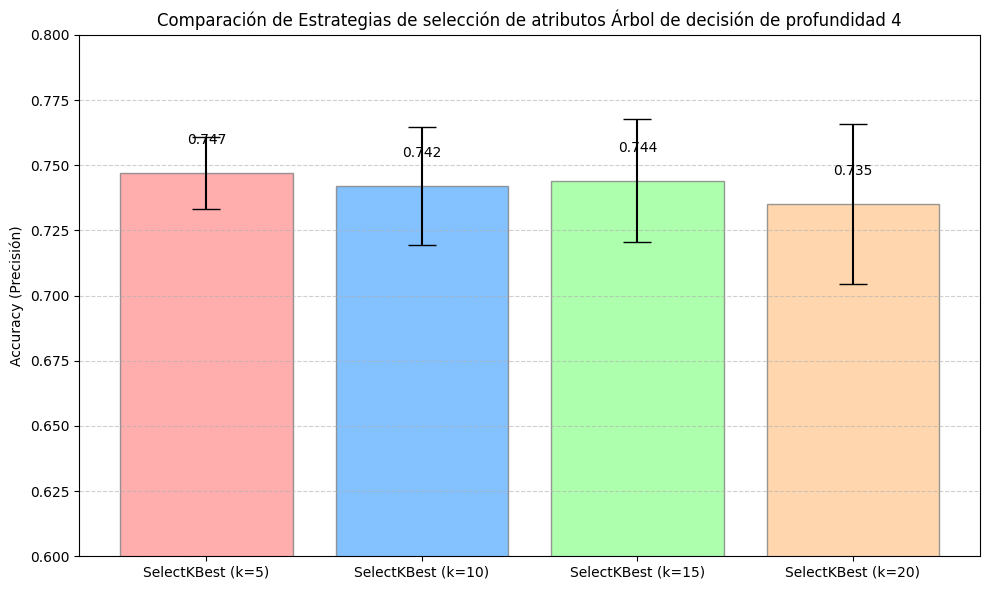

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler, PolynomialFeatures
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import VarianceThreshold

# Lista de valores de atributos a probar
valores_k = [5, 10, 15,20]
pipelines = []

for k in valores_k:
    # Establecemos el nombre que aparecerá en la gráfica
    nombre_pipe = f'SelectKBest (k={k})'
    
    # Creamos el pipeline que se quedará con los k mejores atributos
    pipe_temp = Pipeline([
        ('selector', SelectKBest(f_classif, k=k)),
        ('model', DecisionTreeClassifier(max_depth=max_index_tree, random_state = 13))
    ])
    
    pipelines.append((nombre_pipe, pipe_temp))

results_mean = []
results_std = []
names = []

results = []
for name, pipe in pipelines:

    scores = cross_val_score(pipe, X, y, cv=5)
    
    results_mean.append(scores.mean())
    results_std.append(scores.std())
    names.append(name)
    
    # Guardamos los datos para las tablas
    row = {
        'Estrategia': name,
        'Precisión media': scores.mean(),
        'Desviación Std': scores.std(),
        'Error (1-acc)': 1 - scores.mean()
    }
    results.append(row) 


# Graficamos los resultados
plt.figure(figsize=(10, 6))
bars = plt.bar(names, results_mean, yerr=results_std, capsize=10, 
               color=['#ff9999','#66b3ff','#99ff99','#ffcc99'], alpha=0.8, edgecolor='grey')

plt.ylabel('Accuracy (Precisión)')
plt.title(f'Comparación de Estrategias de selección de atributos Árbol de decisión de profundidad {max_index_tree}')
plt.ylim(0.6, 0.8)
plt.grid(axis='y', linestyle='--', alpha=0.6)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 3), ha='center', va='bottom')

df = pd.DataFrame(results)
display(df)
plt.tight_layout()
plt.show()

En este caso es curioso que la mejor selección de atributos sea utilizar únicamente 5 atributos. Esto se debe a que los árboles de decisión son capaces de capturar relaciones entre las variables y la clase, por lo que no es necesario tener muchas variables para poder predecir correctamente. De hecho, al tener muchas variables, el árbol puede ''confundirse'' y seleccionar variables que no aportan información útil, empeorando la precisión.

Luego, la mejor configuración de preprocesamiento para el árbol de decisión es la selección de atributos, quedándonos con los 5 mejores atributos, terminando con una precisión de 0.747.

## Redes neuronales


,Estrategia,Precisión media,Desviación Std,Error (1-acc)
0,Sin preprocesamiento,0.758,0.018601,0.242
1,Estandarización,0.756,0.017720,0.244
2,Robust Scaler,0.767,0.016000,0.233
3,Ingeniería Atributos,0.698,0.017205,0.302


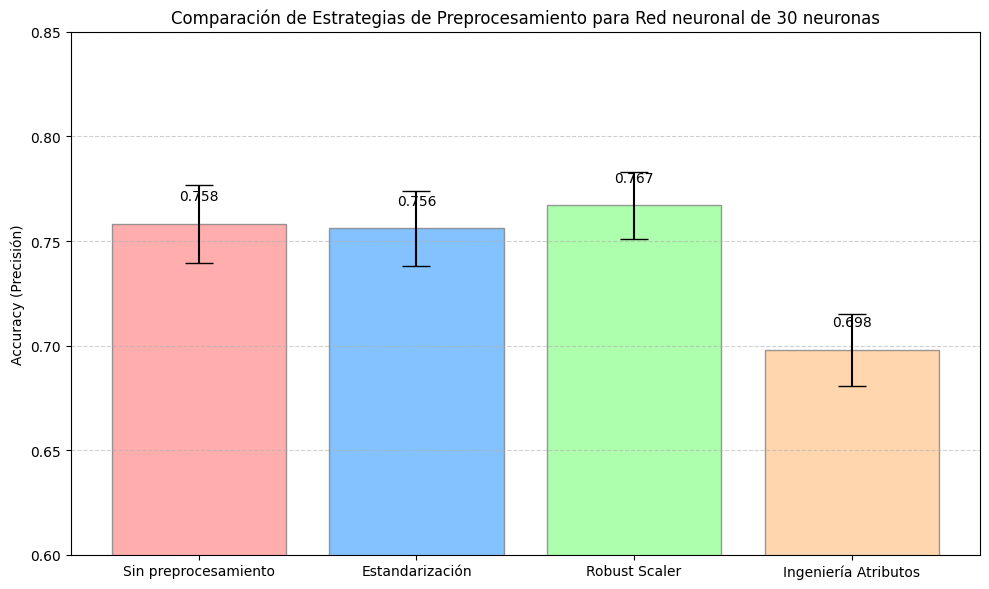

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler, PolynomialFeatures
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import VarianceThreshold

# Definición de los Pipelines
# Calculamos el normal, sin preprocesamiento de datos para comparar con el resto
pipe_base = Pipeline([
    ('model', MLPClassifier(hidden_layer_sizes=(max_index_one_layer,), max_iter=6000, random_state=13))
])

# Estandarización utilizando la media y la desviación típica
pipe_std = Pipeline([
    ('scaler', StandardScaler()),
    ('model', MLPClassifier(hidden_layer_sizes=(max_index_one_layer,), max_iter=6000, random_state=13))
])

# Manejo de Outliers con el Robust Scaler: utilizando la mediana y el rango intercuartílico
pipe_robust = Pipeline([
    ('scaler', RobustScaler()),
    ('model', MLPClassifier(hidden_layer_sizes=(max_index_one_layer,), max_iter=6000, random_state=13))
])

# Ingeniería de Atributos Completa: donde primero generamos polinomios, escalamos, 
# seleccionamos los mejores atributos y por último entrenamos al modelo
pipe_feature_eng = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('filter_constant', VarianceThreshold(threshold=0)),
    ('scaler', StandardScaler()),
    ('selector', SelectKBest(f_classif, k=15)),
    ('model', MLPClassifier(hidden_layer_sizes=(max_index_one_layer,), max_iter=6000, random_state=13))
])

pipelines = [
    ('Sin preprocesamiento', pipe_base),
    ('Estandarización', pipe_std),
    ('Robust Scaler', pipe_robust),
    ('Ingeniería Atributos', pipe_feature_eng)
]

results_mean = []
results_std = []
names = []

results = []
for name, pipe in pipelines:

    scores = cross_val_score(pipe, X, y, cv=5)
    
    results_mean.append(scores.mean())
    results_std.append(scores.std())
    names.append(name)
    
    # Guardamos los datos para las tablas
    row = {
        'Estrategia': name,
        'Precisión media': scores.mean(),
        'Desviación Std': scores.std(),
        'Error (1-acc)': 1 - scores.mean()
    }
    results.append(row) 


# Graficamos los resultados
plt.figure(figsize=(10, 6))
bars = plt.bar(names, results_mean, yerr=results_std, capsize=10, 
               color=['#ff9999','#66b3ff','#99ff99','#ffcc99'], alpha=0.8, edgecolor='grey')

plt.ylabel('Accuracy (Precisión)')
plt.title('Comparación de Estrategias de Preprocesamiento para Red neuronal de 30 neuronas')
plt.ylim(0.6, 0.85)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Añadir etiquetas de valor
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 3), ha='center', va='bottom')

df = pd.DataFrame(results)
display(df)
plt.tight_layout()
plt.show()

La obtención de datos de la gŕafica es altamente contraintuitiva, ya que para la utilización de modelos como redes neuronales, el preprocesamiento de datos suele ser clave para la obtención de un buen modelo. Llama la atención que tanto la estandarización como la ingeniría de atributos empeoren la precisión del modelo. Aun así, la mejor estrategia es el Robust Scaler, obteniendo una precisión de 0.767, ganando tanto es precisión como en desviación típica frente al modelo base. El hecho de que el Robust Scaler funcione mejor que la estandarización puede deberse a que las redes neuronales son sensibles a outliers. Al utilizar el Robust Scaler, minimizamos el impacto de estos outliers, permitiendo que la red neuronal aprenda mejor los patrones subyacentes en los datos. Aunque este aspecto es extraño, ya que en el caso de kNN vimos que la estandarización era mejor.
Comentamos ahora un par de aspectos importantes:

- En primer lugar, con respecto a la estandarización, observamos que empeora la precisión del modelo. Esto puede deberse a que la red neuronal ya es capaz de aprender las relaciones   no lineales entre las variables y la clase, por lo que el preprocesamiento no aporta nada. Además, es posible que al estandarizar, se pierda información útil para la red neuronal, ya que algunas variables pueden tener una distribución que no es normal, y al estandarizar, se pierde esa información. Aunque sigue resultando extraño, ya que la estandarización dió muy buenos resultados en kNN.

- Por otro lado, con respecto a la ingeniría de atributos, observamos que obtiene la peor precisión por lo ya comentado en los modelos anteriores. Añadir más atributos, expandiendo el espacio de búsqueda, introduce ruido. Como las redes neuronales ya son capaces de extraer relaciones no lineales, añadir las características polinómicas solo complica la predicción.

Por último, hemos decidido realizar un estudio de selección de atributos. Para ello, hacemos lo que hemos hecho anteriormente. En este caso, al igual que en el de los árboles, como la estandarización no aporta nada, hemos decidido no incluirla en el pipeline.

,Estrategia,Precisión media,Desviación Std,Error (1-acc)
0,SelectKBest (k=5),0.731,0.029394,0.269
1,SelectKBest (k=10),0.759,0.007348,0.241
2,SelectKBest (k=15),0.768,0.013266,0.232
3,SelectKBest (k=20),0.763,0.026000,0.237


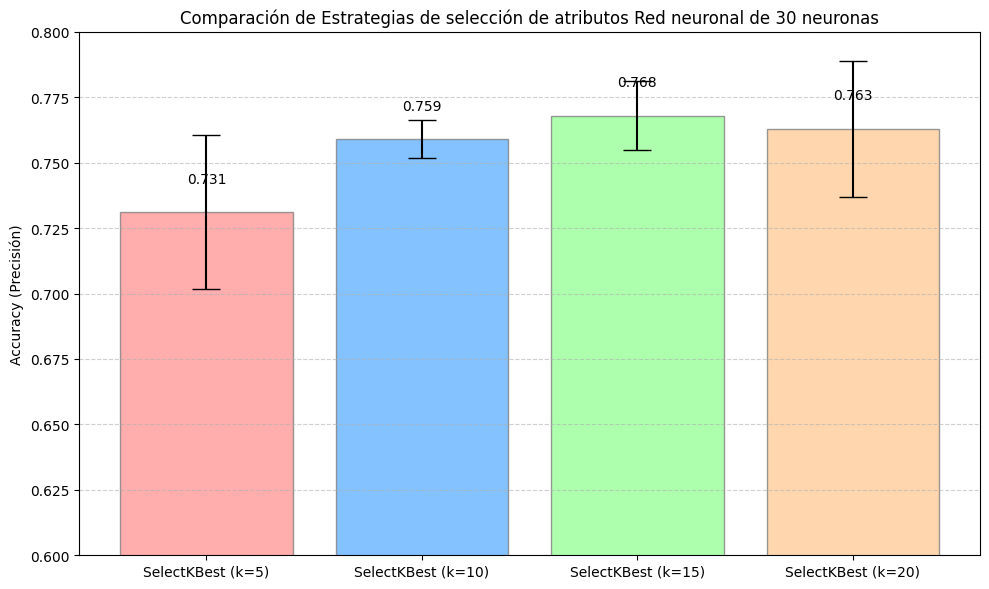

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler, PolynomialFeatures
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import VarianceThreshold
from sklearn.neural_network import MLPClassifier

# Lista de valores de atributos a probar
valores_k = [5, 10, 15, 20]
pipelines = []

for k in valores_k:
    # Establecemos el nombre que aparecerá en la gráfica
    nombre_pipe = f'SelectKBest (k={k})'
    
    # Creamos el pipeline que se quedará con los k mejores atributos
    pipe_temp = Pipeline([
        ('scaler', RobustScaler()),
        ('selector', SelectKBest(f_classif, k=k)),
        ('model', MLPClassifier(hidden_layer_sizes=(max_index_one_layer,), max_iter=6000, random_state=13))
    ])
    
    pipelines.append((nombre_pipe, pipe_temp))

results_mean = []
results_std = []
names = []

results = []
for name, pipe in pipelines:

    scores = cross_val_score(pipe, X, y, cv=5)
    
    results_mean.append(scores.mean())
    results_std.append(scores.std())
    names.append(name)
    
    # Guardamos los datos para las tablas
    row = {
        'Estrategia': name,
        'Precisión media': scores.mean(),
        'Desviación Std': scores.std(),
        'Error (1-acc)': 1 - scores.mean()
    }
    results.append(row) 


# Graficamos los resultados
plt.figure(figsize=(10, 6))
bars = plt.bar(names, results_mean, yerr=results_std, capsize=10, 
               color=['#ff9999','#66b3ff','#99ff99','#ffcc99'], alpha=0.8, edgecolor='grey')

plt.ylabel('Accuracy (Precisión)')
plt.title(f'Comparación de Estrategias de selección de atributos Red neuronal de 30 neuronas')
plt.ylim(0.6, 0.8)
plt.grid(axis='y', linestyle='--', alpha=0.6)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 3), ha='center', va='bottom')

df = pd.DataFrame(results)
display(df)
plt.tight_layout()
plt.show()

Obtenemos, otra vez, unos resultados que pueden parecer extraños. Para el caso de redes neuronales, la mejor configuración es utilizar 15 de los 20 atributos. Esto puede deberse a que las redes neuronales son capaces de aprender relaciones complejas entre las variables y la clase, por lo que tener más variables puede ayudar a la red a aprender mejor los patrones subyacentes en los datos. Además, al tener más variables, la red tiene más información para hacer las predicciones, lo que puede mejorar la precisión. Esto, aunque puede parecer que contradice a lo obtenido en kNN y árboles, pero tiene sentido, ya que las redes neuronales son modelos mucho más complejos y capaces de aprender relaciones no lineales entre las variables y la clase, mientras que kNN y los árboles son modelos más simples y que suelen beneficiarse de la reducción de dimensionalidad.

Por lo tanto, la mejor configuración de preprocesamiento para el caso de las redes neuronales es la del Robust Scaler junto con la selección de atributos, quedándonos con los 15 mejores atributos, terminando con una precisión de 0.768.

## **3. Análisis**

## **¿Cómo se determina el valor de los hiperparámetros?**

**Para determinar el valor de los hiperparámetros de un modelo realizaremos una búsqueda en una rejilla. De entre los valores considerados seleccionaremos los que maximicen la estimación por validación cruzada (K = 10) de la tasa de acierto.**

**Adapta el código que encontrarás en 
[https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html#sphx-glr-auto-examples-model-selection-plot-grid-search-digits-py](https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html#sphx-glr-auto-examples-model-selection-plot-grid-search-digits-py)
a este problema.**

**En los tutoriales
[https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html](
    https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)
[https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
hay información sobre cada uno de los hiper-parámetros. 
Puedes elegir el conjunto de hiperparametros en el que se realiza la optimización. 
Antes de elegir la rejilla de hiperparámetros, asegúrate de que entiendes su para asegurarte que tiene sentido la búsqueda.**

Antes de comenzar con el propio código, definimos que vamos a buscar y porqué:

- Árbol de decisión:

    * `max_depth`: que, como ya hemos comentado antes, determina la profundidad máxima del árbol. Si es muy alto, el modelo memoriza los datos (sobreajuste); si es muy bajo, no aprende lo suficiente (subajuste).

    * `min_samples_split`: el número mínimo de muestras necesarias para dividir un nodo. Valores más altos evitan que el árbol tome decisiones basadas en muy pocos datos (ruido).

    * `criterion`: función para medir la calidad de la división. Los criterios admitidos son “gini” para la impureza de Gini y “log_loss” y “entropy”, ambos para la ganancia de información de Shannon. Aunque los más comunes con Gini y entropy, asi que utilizaremos solo estos.

- K-Vecinos más cercanos.

    * `n_neighbors`: el número de vecinos a consultar, como ya hemos comentado antes.

    * `weights`: determina si todos los vecinos votan igual (uniform) o si los más cercanos tienen más peso (distance).
    
    * `metric`: determina el tipo de distancia que utiliza el modelo para ver cómo de ''distintos'' son dos elementos.

Para realizar este análisis nos basamos en el ejemplo del tutorial de Digits facilitado en el enunciado, asegurándonos de que el entrenamiento se realiaza por validación cruzada de K=10.

In [34]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


def realizar_grid_search_df(modelo, parametros, nombre_modelo):
    # Obtenemos el modelo que mejora la precisión
    clf = GridSearchCV(modelo, parametros, cv=10, scoring='accuracy')
    
    # Entrenamos
    clf.fit(X, y)
    
    # Creamos la tabla
    resultados = pd.DataFrame(clf.cv_results_)
    columnas_reales = ['params', 'mean_test_score', 'std_test_score', 'rank_test_score']
    tabla = resultados[columnas_reales].copy()
    nombres_nuevos = {
        'params': 'Parámetros',
        'mean_test_score': 'Precisión Media',
        'std_test_score': 'Desviación',
        'rank_test_score': 'Ranking'
    }
    tabla = tabla.rename(columns=nombres_nuevos)
    
    # Ordenamos por ranking
    tabla = tabla.sort_values(by='Ranking')

    # Añadimos el nombre del algoritmo
    tabla.insert(0, 'Algoritmo', nombre_modelo)
    
    return tabla, clf

# Obtención de datos de árboles
tree_params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None] + list(range(1, 31, 2)),
    'min_samples_split': [2, 5, 10, 15, 20]
}

df_arboles, model_tree = realizar_grid_search_df(
    DecisionTreeClassifier(random_state=13), 
    tree_params, 
    "Árbol de Decisión"
)

# Obtención de datos de vecinos
knn_params = {
    'n_neighbors': [3, 4, 5, 7, 9, 11, 12, 14, 15, 16],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

df_knn, model_knn = realizar_grid_search_df(
    KNeighborsClassifier(), 
    knn_params, 
    "K-Neighbors"
)

print("Resultados de la búsqueda en Árboles de Decisión:")
display(df_arboles.head(5))

print("Resultados de la búsqueda en kNN:")
display(df_knn.head(5))

# Unir y mostrar el mejor de cada uno
mejor_arbol = df_arboles.iloc[[0]]
mejor_knn = df_knn.iloc[[0]]
resumen_final = pd.concat([mejor_arbol, mejor_knn], ignore_index=True)

print("Resultados finales con el mejor de cada algoritmo:")
display(resumen_final[['Algoritmo', 'Parámetros', 'Precisión Media']])

Resultados de la búsqueda en Árboles de Decisión:


,Algoritmo,Parámetros,Precisión Media,Desviación,Ranking
104,Árbol de Decisión,"{'criterion': 'entropy', 'max_depth': 7, 'min_...",0.736,0.024576,1
103,Árbol de Decisión,"{'criterion': 'entropy', 'max_depth': 7, 'min_...",0.734,0.024576,2
100,Árbol de Decisión,"{'criterion': 'entropy', 'max_depth': 7, 'min_...",0.733,0.024515,3
21,Árbol de Decisión,"{'criterion': 'gini', 'max_depth': 7, 'min_sam...",0.732,0.027495,4
101,Árbol de Decisión,"{'criterion': 'entropy', 'max_depth': 7, 'min_...",0.732,0.018330,4


Resultados de la búsqueda en kNN:


,Algoritmo,Parámetros,Precisión Media,Desviación,Ranking
37,K-Neighbors,"{'metric': 'manhattan', 'n_neighbors': 15, 'we...",0.739,0.029816,1
31,K-Neighbors,"{'metric': 'manhattan', 'n_neighbors': 11, 'we...",0.735,0.036946,2
34,K-Neighbors,"{'metric': 'manhattan', 'n_neighbors': 14, 'we...",0.735,0.021564,2
36,K-Neighbors,"{'metric': 'manhattan', 'n_neighbors': 15, 'we...",0.734,0.022450,4
39,K-Neighbors,"{'metric': 'manhattan', 'n_neighbors': 16, 'we...",0.734,0.035553,4


Resultados finales con el mejor de cada algoritmo:


,Algoritmo,Parámetros,Precisión Media
0,Árbol de Decisión,"{'criterion': 'entropy', 'max_depth': 7, 'min_...",0.736
1,K-Neighbors,"{'metric': 'manhattan', 'n_neighbors': 15, 'we...",0.739


Luego, después de ver todos los datos en las tablas, al visualizarlo en gráfica es más complicado por el número de parámetros que varían en el estudio, llegamos a la siguiente conclusión. 

El modelo que nos aporta más precisión de entre los probados de árbol de decisión y búsqueda de vecinos es este últimO con varias modificaciones al modelo original.
- La métrica, en vez de ser la Euclídea, la estándar para la búsqueda, se utiliza la distancia Manhattan.
- El número de vecinos se ve ligeramente modificado de aquel obtenido con el entrenamiento de 5 folds y distancia euclídea de 14 a 12.
- Por último, determina que se le da más peso a los vecinos más cercanos. 

## **¿Cómo se estima el error de generalización?**

**Estimaremos el error de generalización de cada clasificador usando *Nested Cross Validation*.** 


**Adapta el código que encontrarás en https://scikit-learn.org/stable/auto_examples/model_selection/plot_nested_cross_validation_iris.html para resolver este problema con una red neuronal.** 


Para realizar este apartado, nos hemos basado en el apartado anterior. El error de generalización es una métricA muy importante y muy necesaria en machine learning. Mide la capacidad de un modelo para predecir datos que no ha visto nunca antes.
Para evitarlo, utilizamos el *Nested Cross Validation*. Este consiste en lo siguiente:
- Bucle externo que se encarga de obtener la precisión del modelo con datos que el modelo entrenado nunca ha visto, de este modo, puede calcular el erro real.
- Bucle interno, que realiza el GridSearchCV como en el apartado anterior. ES el bucle que permite elegir al mejor modelo, determinando sus hiperparámetros.

,Trial_ID,Accuracy (Non-Nested),Std (Non-Nested),Accuracy Real (Nested),Diferencia,Mejores Params
3,3,0.798000,0.037363,0.784000,0.014000,"{'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (30,), 'learning_rate': 'constant', 'solver': 'adam'}"
0,0,0.789000,0.017000,0.777000,0.012000,"{'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (30,), 'learning_rate': 'constant', 'solver': 'adam'}"
2,2,0.782000,0.033106,0.761000,0.021000,"{'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (30,), 'learning_rate': 'constant', 'solver': 'adam'}"
1,1,0.782000,0.054369,0.777000,0.005000,"{'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate': 'adaptive', 'solver': 'sgd'}"
4,4,0.781000,0.041581,0.758000,0.023000,"{'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (30,), 'learning_rate': 'constant', 'solver': 'adam'}"


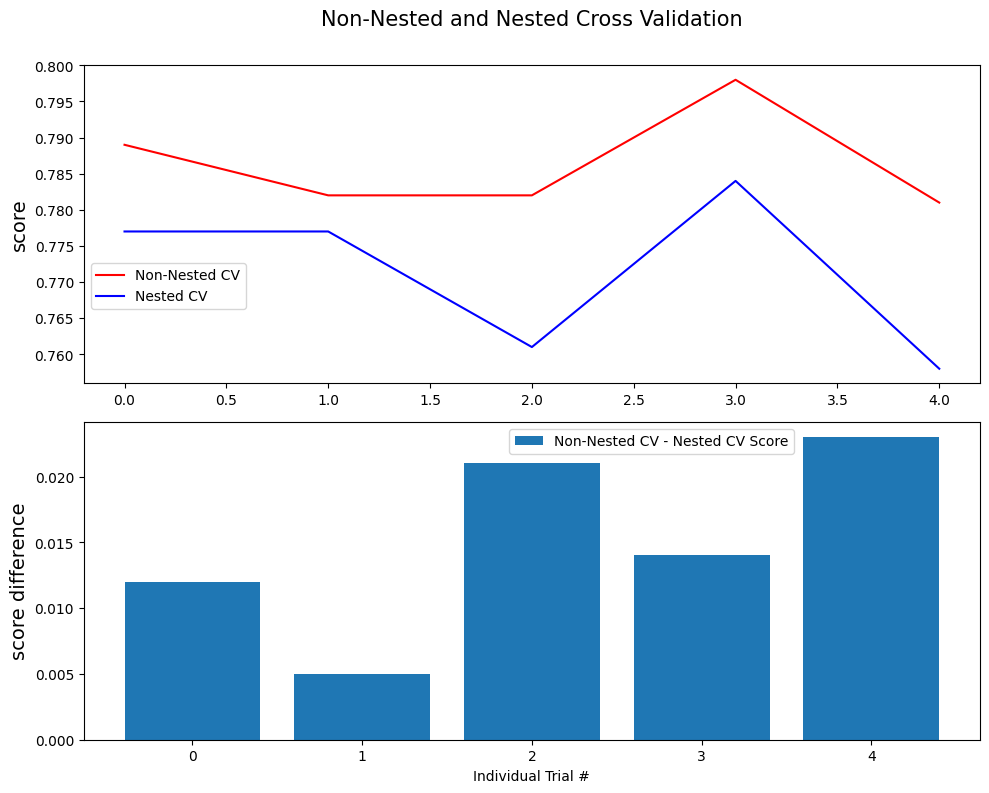

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.neural_network import MLPClassifier

NUM_TRIALS = 5
p_grid = {
    # Arquitecturas:
    'hidden_layer_sizes': [(30,), (30, 30), (50,), (100,), (50, 50), (100, 50, 25)],
    
    # Activación:
    # 'relu': Rectified Linear Unit
    # 'tanh': Tangente hiperbólica (clásica)
    'activation': ['relu', 'tanh'],
    
    # Solver (Algoritmo de aprendizaje):
    # 'adam': Bueno para datos grandes/medios, muy rápido.
    # 'sgd': Stochastic Gradient Descent (a veces encuentra mínimos más generales)
    'solver': ['adam', 'sgd'],
    
    # Regularización L2 (Alpha):
    # Valores bajos (0.0001): El modelo se ajusta mucho a los datos
    # Valores altos (0.01, 0.1): El modelo es más simple (evita overfitting)
    'alpha': [0.0001, 0.01, 0.1],
    
    'learning_rate': ['constant', 'adaptive']
}

model = MLPClassifier(max_iter=6000, random_state=13)

# Arrays para las gráficas
non_nested_scores = np.zeros(NUM_TRIALS)
nested_scores = np.zeros(NUM_TRIALS)

datos_trials = []

for i in range(NUM_TRIALS):
    inner_cv = KFold(n_splits=4, shuffle=True, random_state=i)
    outer_cv = KFold(n_splits=10, shuffle=True, random_state=i)

    # Buscamos los mejores parámetros
    clf = GridSearchCV(estimator=model, param_grid=p_grid, cv=outer_cv)
    clf.fit(X, y)
    non_nested_scores[i] = clf.best_score_
    
    # Extraemos datos clave
    best_idx = clf.best_index_
    
    # Estimamos los datos reales con el cross_val_scrore
    clf_nested = GridSearchCV(estimator=model, param_grid=p_grid, cv=inner_cv)
    nested_score = cross_val_score(clf_nested, X=X, y=y, cv=outer_cv)
    nested_scores[i] = nested_score.mean()
    
    # Guardamos en diccionario
    registro = {
        'Trial_ID': i,
        'Accuracy (Non-Nested)': clf.best_score_,
        'Std (Non-Nested)': clf.cv_results_['std_test_score'][best_idx],
        'Accuracy Real (Nested)': nested_scores[i],
        'Diferencia': clf.best_score_ - nested_scores[i],
        'Mejores Params': clf.best_params_
    }
    datos_trials.append(registro)

df_resultados = pd.DataFrame(datos_trials)
df_ordenado = df_resultados.sort_values(by='Accuracy (Non-Nested)', ascending=False)
columnas_ordenadas = [
    'Trial_ID', 
    'Accuracy (Non-Nested)', 
    'Std (Non-Nested)', 
    'Accuracy Real (Nested)', 
    'Diferencia',
    'Mejores Params'
]
df_ordenado = df_ordenado[columnas_ordenadas]

# Imprimimos solo las 5 mejores configuraciones
display(df_ordenado.head(5).style.set_caption('Mejores 5 configuraciones'))

# Ploteamos las gráficas
score_difference = non_nested_scores - nested_scores

plt.figure(figsize=(10, 8))
plt.subplot(211)
(non_nested_scores_line,) = plt.plot(non_nested_scores, color="r")
(nested_line,) = plt.plot(nested_scores, color="b")
plt.ylabel("score", fontsize="14")
plt.legend(
    [non_nested_scores_line, nested_line],
    ["Non-Nested CV", "Nested CV"],
    bbox_to_anchor=(0, 0.4, 0.5, 0),
)
plt.title(
    "Non-Nested and Nested Cross Validation",
    x=0.5,
    y=1.1,
    fontsize="15",
)

plt.subplot(212)
difference_plot = plt.bar(range(NUM_TRIALS), score_difference)
plt.xlabel("Individual Trial #")
plt.legend(
    [difference_plot],
    ["Non-Nested CV - Nested CV Score"],
    bbox_to_anchor=(0, 1, 0.8, 0),
)
plt.ylabel("score difference", fontsize="14")
plt.tight_layout()
plt.show()

In [ ]:
# Tabla para el pdf final, con la información ya rellenada
import pandas as pd

pd.set_option('display.max_colwidth', None) 

data = {
    "Trial_ID": [3, 0, 2, 1, 4],
    "Accuracy (Non-Nested)": [0.798000, 0.789000, 0.782000, 0.782000, 0.781000],
    "Std (Non-Nested)": [0.037363, 0.017000, 0.033106, 0.054369, 0.041581],
    "Accuracy Real (Nested)": [0.784000, 0.777000, 0.761000, 0.777000, 0.758000],
    "Diferencia": [0.014000, 0.012000, 0.021000, 0.005000, 0.023000],
    "Mejores Params": [
        {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (30,), 'learning_rate': 'constant', 'solver': 'adam'},
        {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (30,), 'learning_rate': 'constant', 'solver': 'adam'},
        {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (30,), 'learning_rate': 'constant', 'solver': 'adam'},
        {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate': 'adaptive', 'solver': 'sgd'},
        {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (30,), 'learning_rate': 'constant', 'solver': 'adam'}
    ]
}

df = pd.DataFrame(data)
display(df)

,Trial_ID,Accuracy (Non-Nested),Std (Non-Nested),Accuracy Real (Nested),Diferencia,Mejores Params
0,3,0.798,0.037363,0.784,0.014,"{'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (30,), 'learning_rate': 'constant', 'solver': 'adam'}"
1,0,0.789,0.017000,0.777,0.012,"{'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (30,), 'learning_rate': 'constant', 'solver': 'adam'}"
2,2,0.782,0.033106,0.761,0.021,"{'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (30,), 'learning_rate': 'constant', 'solver': 'adam'}"
3,1,0.782,0.054369,0.777,0.005,"{'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate': 'adaptive', 'solver': 'sgd'}"
4,4,0.781,0.041581,0.758,0.023,"{'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (30,), 'learning_rate': 'constant', 'solver': 'adam'}"


Lo primero a comentar dados los resultados es que hemos obtenido justo lo esperado. La línea roja de la primera gŕafica, el decir la correspondiente al Non-Nested CV, está sistemáticamente por encima de la azul. Esto confirma lo que habíamos visto de que el Non-Nested tiende a ser optimista debido a que son los mismos datos los que se utilizan para calcular los hiperparámetros como para evaluar el modelo. Justo para evitar este aspecto, realizamos el Nested CV, para ver cómo se comporta el modelo con datos reales que no han sido incluidos de ningún modo en el entrenamiento y selección de hiperparámetros. Por lo tanto, el valor real de precisión del modelo es el del Nested CV.

El modo de interpretar la gŕafica de abajo es la siguiente:

- Dicho error hacer referencia a la cantidad de sobreajuste por lo comentado anteriormente.

- Si la diferencia fuese 0, significaría que los hiperparámetros seleccionados no introducen ningún sesgo o sobreajuste. Por el contrario, si la diferencia, es decir, el gráfico de barras, mostrase una diferencia enorme, significaría que el modelo seleccionado funciona correctamente unicamente en los datos de entrenamiento.

- Como en nuestro caso las diferencias son moderadas, el modelo es aceptable y confirma justamente lo esperado.

Como conclusión de los datos obtenidos, el mejor modelo, fijándonos unicamente en precisión sería el generado en el intento 3 (modelo 3), es decir, la red neuronal con activación relu, valor alpha de 0.001, una única capa de 30 neuronas, paso de entrenamiento constante y con adam como solver. Este modelo obtiene una precisión real de 0.784 y una desviación típica de 0.037363. Aun así, habría que barajar la opción de utilizar el modelo 0, la red neuronal con la misma configuración pero alpha con valor de 0.01, al tener este modelo una precisión de 0.777 y una menor diferencia con respecto a la precisión real y la obtenida en el entrenamiento, pero más importante, tener una menor desviación típica. En concreto, 0.017, lo que denota que este modelo es más estable.

## **¿Cuál es el mejor clasificador?**

* **De acuerdo con los resultados de los anteriores apartados, indica cuál es el mejor clasificador encontrado.**
* **¿Cuáles son los valores de los hiperparámetros utilizados para configurar y entrenar tal  clasificador?**
* **¿Cuáles son los valores de los parámetros del clasificador entrenado?**
* **Proporciona una estimación del error de generalización por validación cruzada, así como de la incertidumbre de dicha estimación.**


Teniendo en cuenta todo lo analizado en el notebook, y tomando la precisión como la métrica que determina el mejor comportamiento del modelo, sin tener en cuenta la desviación típica, hemos llegado a la siguiente conclusión. El mejor modelo es la Red Neuronal Unicapa de 30 neuronas, la comentada en el apartado anterior como modelo 3, con la siguiente configuración: activación relu, valor alpha de 0.001, paso de entrenamiento constante y con adam como solver que nos proporciona una precisión de 0.784, sin tener en cuenta el preprocesamiento de datos, luego la precisión será incluso algo más elevada. Además, con respecto al preprocesamiento hemos visto que en el caso de las redes neuronales la mejor opción es la del Robust Scaler junto con la selección de atributos, quedándonos con los 15 mejores atributos.

Este modelo mejora notablemente al resto de modelos que hemos visto, tanto a los modelos lineales: kNN, con una precisión que se estancaba en el 0.732, y Árboles de decisión, con una precisión que se estancanba en 0.737. Por ello, la diferencia de precisión, un 5%, justifica la elección de una red neuronal a pesar de su mayor complejidad y coste.


## **4. Conclusiones.**

Como conclusiones finales de todo lo analizado, establecemos una tabla como síntesis del mejor modelo de cada tipo así como un par de comentarios de cada aspecto:

| Familia de Modelo | Mejor Preprocesamiento | Precisión | Desviación Est. | Observación |
|--------------|--------------|--------------|--------------|--------------|
| k-Vecinos (kNN) | Estandarización y selección de 10 atributos | 0.732 | 0.006 | El preprocesamiento fue necesario para alcanzar su máximo potencial. | 
| Árboles de Decisión  | Selección de 5 atributos | 0.747  |0.027 | El modelo es invariante al escalado, de hecho, empeora con ingeniería de atributos.|
| Redes Neuronales  | RobustScaler y selección de 15 atributos | 0.784*  |0.037 | El modelo más potente|

*Valor obtenido tras la optimización de hiperparámetros (GridSearch) sobre los datos sin procesar.

Luego como veredicto final y unificando todo.
- **Superioridad de la Red Neuronal:** Existe una clara ventaja de rendimiento (~78.4%) al utilizar redes neuronales frente a modelos clásicos como Árboles o KNN, que parecen haber encontrado un límite estructural alrededor del 73-74% de precisión para este conjunto de datos.

- **Impacto del Preprocesamiento:** Se ha observado un comportamiento variado. Mientras que KNN se benefició de la estandarización y selección de atributos (subiendo de 0.716 a 0.732), los Árboles funcionaron mejor con unicamente selección de atributos y la Red Neuronal con el RobustScaler y selección de atributos.

- **Selección para Producción:** Seleccionamos la Red Neuronal (Modelo 3, sin preprocesamiento) como el modelo final. Aceptamos el aumento de complejidad y el mayor coste computacional a cambio de la obtención de la mejor precisión posible, con un error estimado del 21.6%.


Aun así, en cuanto a las precisiones finales, hay que tener en cuenta que no se ha realizado un análisis exhaustivo de ambos hiperparámetros y preprocesamientos. Por lo tanto, es posible que existan combinaciones mejores que las obtenidas.